# FAA Project - predict Heart Attack

## Load in packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', None)
%matplotlib inline 


import warnings
warnings.filterwarnings('ignore')

## Load in 2019 dataset

In [2]:
df = pd.read_csv('2019_data.csv', index_col=0)
df.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
1604,132687801.0,1958.0,2019.0,61.0,I132,I132,I214,I5033,J9601,Z6841,N185,L97421,L97529,J810,I5023,E1122,I5021,E11621,I2510,E872,1.0,169750111.0,NOVOLOG
1605,132687801.0,1958.0,2019.0,61.0,I130,I130,E872,I160,I5033,N184,I161,I5023,E1165,D631,E1122,N185,I10,NaN,NaN,NaN,1.0,169750111.0,NOVOLOG
1607,133117002.0,1963.0,2019.0,56.0,J9601,J9601,E875,I132,I5032,N186,I444,R079,R918,E1122,R739,E1165,D631,E876,E8339,E8779,2.0,169750111.0,NOVOLOG
1608,133117002.0,1963.0,2019.0,56.0,A419,A419,A0472,I132,I21A1,N186,I240,R079,R1084,R109,R112,I5032,R1011,Z136,E0842,E782,2.0,169750111.0,NOVOLOG
1609,133276802.0,1959.0,2019.0,59.0,K5732,K5732,I255,I5022,I69354,J449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,169750111.0,NOVOLOG


In [27]:
df.tail()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
4924376,1380454402,1972,2019,47,N179,N179,I442,I5030,G4733,R1032,999,999,999,999,999,999,999,999,999,999,2,10135063205,BENZONATATE
4924377,1380454402,1972,2019,47,I469,I469,J810,I4901,I5020,Z4682,I509,J9690,R739,Z452,I429,Z8674,I5032,I5082,R918,I462,2,10135063205,BENZONATATE
4924439,1397010702,1961,2019,58,I161,I161,E1122,E1142,E11649,E872,I21A1,I5032,N179,N186,I249,J90,R0602,N19,N170,J9811,2,10542001510,DIALYVITE 800 WITH ZINC 15
4924486,1400287401,1957,2019,61,K767,K767,D689,E440,E871,E872,I81,K567,K7031,L7632,I871,N179,I5020,J9811,N189,R188,1,68084045001,TACROLIMUS
4924540,1402258802,1959,2019,59,I130,I130,E222,E785,F17200,F319,I2510,I5043,I517,J441,R0602,I5041,E871,I255,I10,E7849,2,781803401,TRIFLUOPERAZINE HCL


In [4]:
df.shape

(120934, 23)

#### Unique values

In [5]:
df.nunique()

ENROLID    3873
DOBYR        60
YEAR          1
AGE          58
PDX         962
DX1         962
DX2         668
DX3         706
DX4         798
DX5         899
DX6         970
DX7        1027
DX8        1071
DX9        1075
DX10       1022
DX11        973
DX12        990
DX13        979
DX14        946
DX15        937
SEX           2
NDCNUM     8652
PRODNME    1466
dtype: int64

#### Data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120934 entries, 1604 to 4924540
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ENROLID  120934 non-null  float64
 1   DOBYR    120934 non-null  float64
 2   YEAR     120934 non-null  float64
 3   AGE      120934 non-null  float64
 4   PDX      120934 non-null  object 
 5   DX1      120934 non-null  object 
 6   DX2      120934 non-null  object 
 7   DX3      120861 non-null  object 
 8   DX4      120789 non-null  object 
 9   DX5      120726 non-null  object 
 10  DX6      120093 non-null  object 
 11  DX7      119278 non-null  object 
 12  DX8      117700 non-null  object 
 13  DX9      115367 non-null  object 
 14  DX10     111737 non-null  object 
 15  DX11     107046 non-null  object 
 16  DX12     102913 non-null  object 
 17  DX13     97486 non-null   object 
 18  DX14     90229 non-null   object 
 19  DX15     82823 non-null   object 
 20  SEX      120934 non-nu

#### Convert float to integer, it runs faster

In [29]:
df[['ENROLID', 'DOBYR', 'YEAR', 'AGE', 'SEX', 'NDCNUM']] = df[['ENROLID', 'DOBYR', 'YEAR', 'AGE', 'SEX', 'NDCNUM']].astype(int)

In [30]:
df.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
1604,132687801,1958,2019,61,I132,I132,I214,I5033,J9601,Z6841,N185,L97421,L97529,J810,I5023,E1122,I5021,E11621,I2510,E872,1,169750111,NOVOLOG
1605,132687801,1958,2019,61,I130,I130,E872,I160,I5033,N184,I161,I5023,E1165,D631,E1122,N185,I10,999,999,999,1,169750111,NOVOLOG
1607,133117002,1963,2019,56,J9601,J9601,E875,I132,I5032,N186,I444,R079,R918,E1122,R739,E1165,D631,E876,E8339,E8779,2,169750111,NOVOLOG
1608,133117002,1963,2019,56,A419,A419,A0472,I132,I21A1,N186,I240,R079,R1084,R109,R112,I5032,R1011,Z136,E0842,E782,2,169750111,NOVOLOG
1609,133276802,1959,2019,59,K5732,K5732,I255,I5022,I69354,J449,999,999,999,999,999,999,999,999,999,999,1,169750111,NOVOLOG


## Exploratory Data Analysis

### Number of different diagnosis a patient had in 2018

In [9]:
df['ENROLID'].value_counts().head()

635620701     564
1227108202    525
519058803     462
1230674901    448
875369301     413
Name: ENROLID, dtype: int64

### Top 10 patient who had most diagnosis in 2019

In [10]:
df['ENROLID'].value_counts().to_frame().head(10)

,ENROLID
635620701,564
1227108202,525
519058803,462
1230674901,448
875369301,413
1350232101,392
159871402,384
623438402,370
145155202,364
720771002,350


### Top 10 most used drugs in 2019

In [11]:
df['PRODNME'].value_counts().to_frame().head(10)

,PRODNME
ATORVASTATIN CALCIUM,4103
CARVEDILOL,3642
FUROSEMIDE,3001
POTASSIUM CHLORIDE,2737
LISINOPRIL,2562
METOPROLOL SUCCINATE,2396
SPIRONOLACTONE,2145
HYDROCODONE BITARTRATE-ACETAMINOPHEN,2046
LOSARTAN POTASSIUM,2020
AMLODIPINE BESYLATE,1931


### Medication that each patient took in 2019

In [12]:
df.groupby('ENROLID')['PRODNME'].value_counts().to_frame().head(20)

PRODNME
ENROLID   PRODNME                                      
131856402 POTASSIUM CHLORIDE                          4
          CARVEDILOL                                  3
          FUROSEMIDE                                  3
          PRAVASTATIN SODIUM                          2
          CLOPIDOGREL                                 1
          ENTRESTO                                    1
          FINASTERIDE                                 1
          HYDROCODONE BITARTRATE-ACETAMINOPHEN        1
          ISOSORBIDE DINITRATE                        1
          SUPREP BOWEL PREP KIT                       1
          TAMSULOSIN HCL                              1
          TEMAZEPAM                                   1
          TRAZODONE HYDROCHLORIDE                     1
          XARELTO                                     1
131946001 AMPHETAMINE SALT COMBO                      4
          DOXYCYCLINE HYCLATE                         4
          OXYCODONE HCL                               4
          ALPRAZOLAM                                  2
          AMOXICILLIN/CLAVULANATE POTASSIUM           2
          ARIPIPRAZOLE                                2

### Missing values

In [13]:
df.isnull().sum()

ENROLID        0
DOBYR          0
YEAR           0
AGE            0
PDX            0
DX1            0
DX2            0
DX3           73
DX4          145
DX5          208
DX6          841
DX7         1656
DX8         3234
DX9         5567
DX10        9197
DX11       13888
DX12       18021
DX13       23448
DX14       30705
DX15       38111
SEX            0
NDCNUM         0
PRODNME        0
dtype: int64

#### Visualize the null value

<AxesSubplot:>

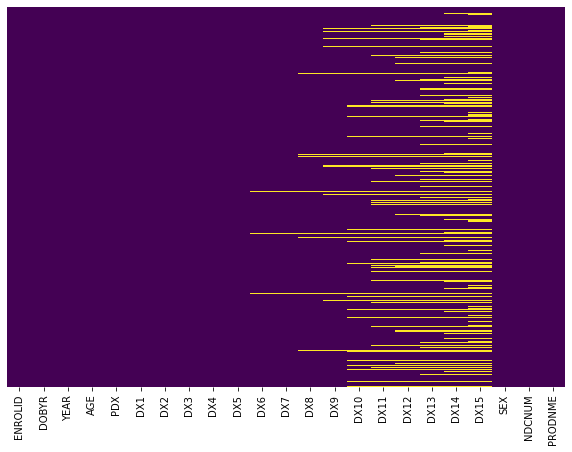

In [14]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis')

#### fill null value with 999

In [15]:
df = df.fillna('999')

### Visualize the null value again

<AxesSubplot:>

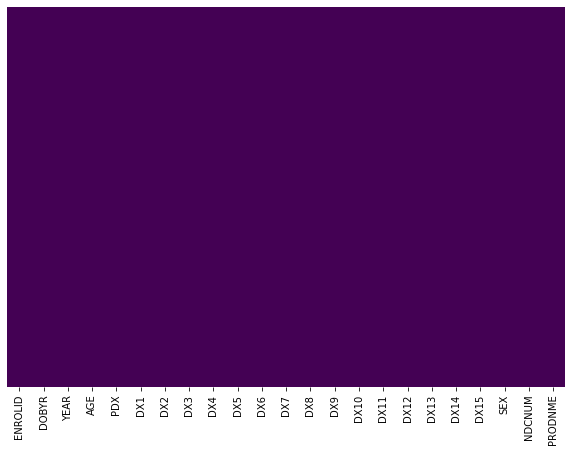

In [16]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis')

### Plots

#### Countplot of diagnosis codes relate to heart disease

In [17]:
dx1 = df.loc[df['DX1'].str.startswith('I')]
dx1['DX1'].value_counts()

I130      11385
I110      11052
I214       4434
I132       2387
I480       2192
          ...  
I314          4
I608          4
I2781         3
I452          2
I63032        1
Name: DX1, Length: 200, dtype: int64

#### DX1 heart disease code

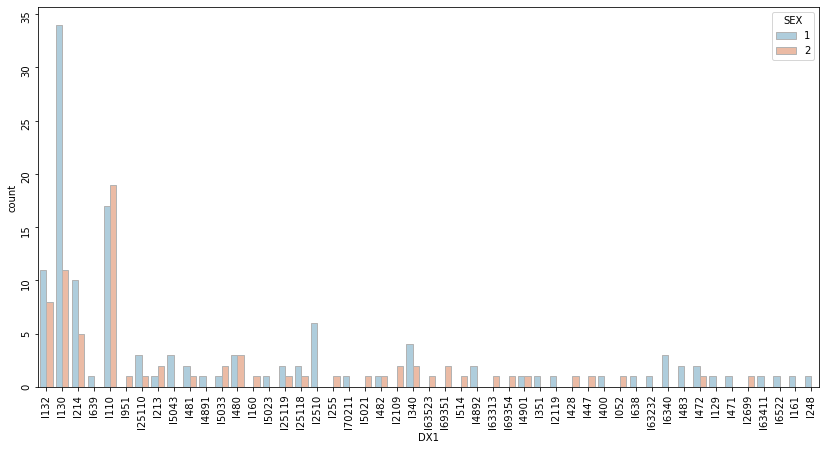

In [18]:
# DX1 
plt.figure(figsize=(14, 7))

sns.countplot(x=dx1['DX1'][:200], hue='SEX', edgecolor=".7", palette='RdBu_r', data=df)
plt.tick_params(labelrotation=90)
plt.legend(loc='upper right', title='SEX')

#### Heart disease code in DX2

In [353]:
# DX2
dx2 = df.loc[df['DX2'].str.startswith('I')]
plt.figure(figsize=(14, 7))

sns.countplot(x=dx2['DX2'][:200], hue='SEX', edgecolor=".7", palette='RdBu_r', data=df)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title='SEX')


KeyError: 'DX2'

#### All the disease code in DX4-DX15

In [20]:
col = [x for x in df.columns if x.startswith('DX')]

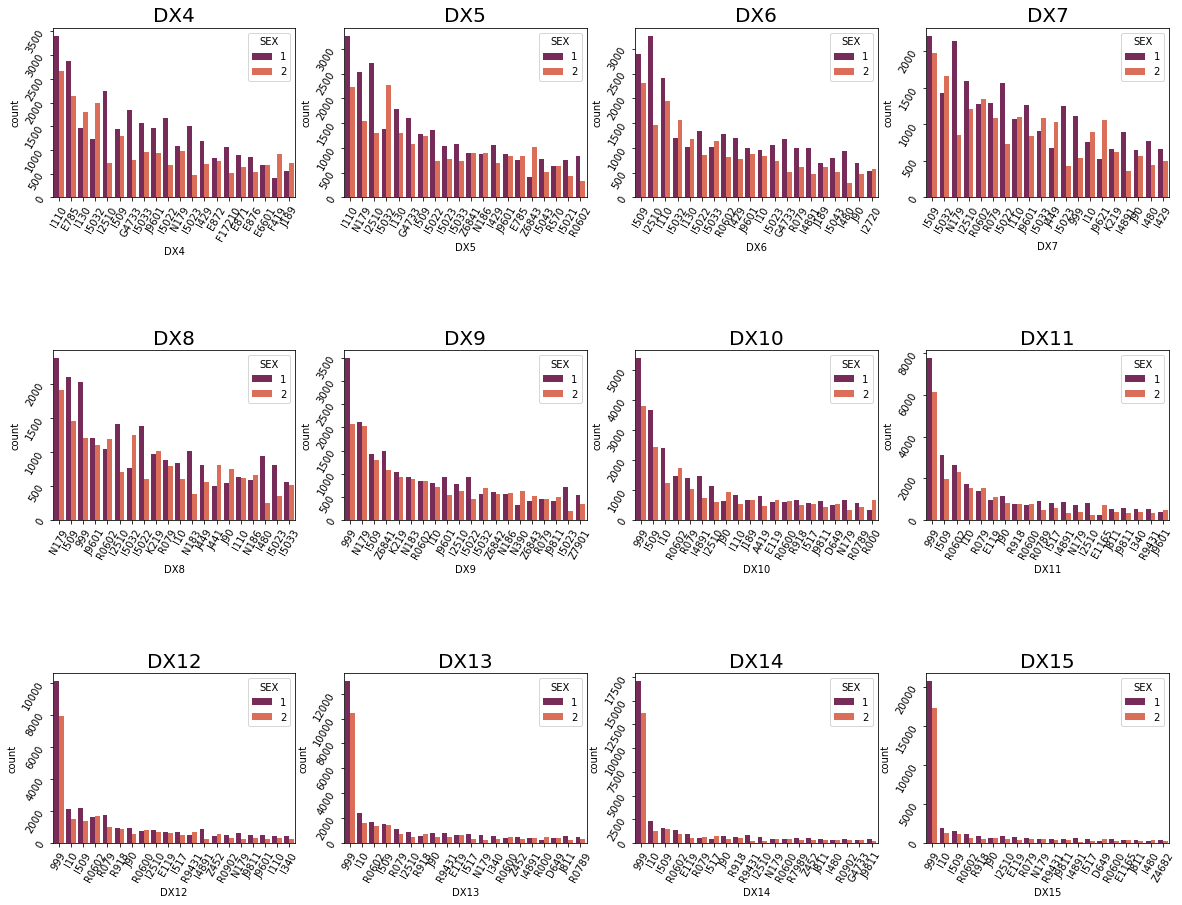

In [21]:

fig, ax = plt.subplots(3, 4, figsize=(20, 15))
ax = ax.ravel()
position = 0

for i in col[3:15]:
    order = df[i].value_counts().iloc[:20].index
    sns.countplot(x=i, ax=ax[position], hue='SEX', palette='rocket', order=order, data=df)
    ax[position].tick_params(labelrotation=60)

    ax[position].set_title(i, fontdict={'fontsize': 20})
    position += 1
    
plt.subplots_adjust(hspace=0.9)
plt.show()

### Top 20 Most Used Heart Disease Drug

<AxesSubplot:xlabel='count', ylabel='PRODNME'>

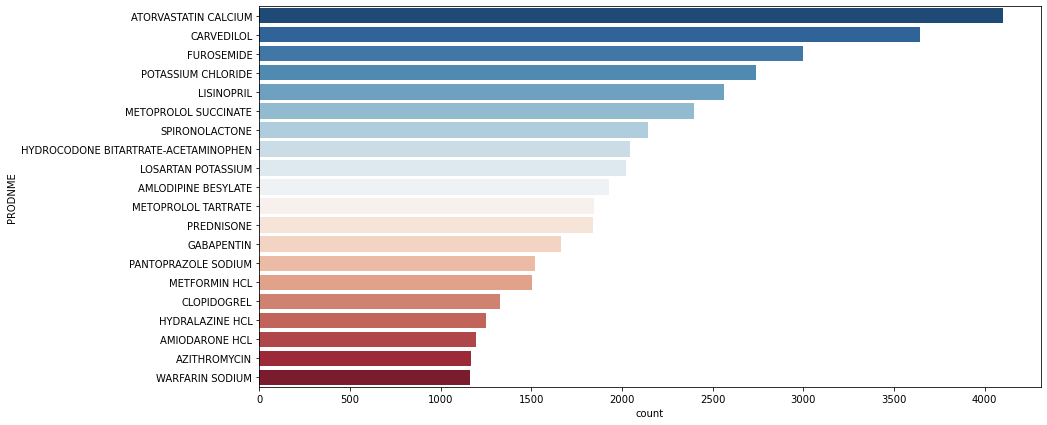

In [22]:
plt.figure(figsize=(14, 7))
sns.countplot(y=df['PRODNME'], order=df.PRODNME.value_counts().iloc[:20].index, 
              palette = 'RdBu_r', data=df)

### Top 20 Most Hospital Visited Patients

<AxesSubplot:xlabel='count', ylabel='ENROLID'>

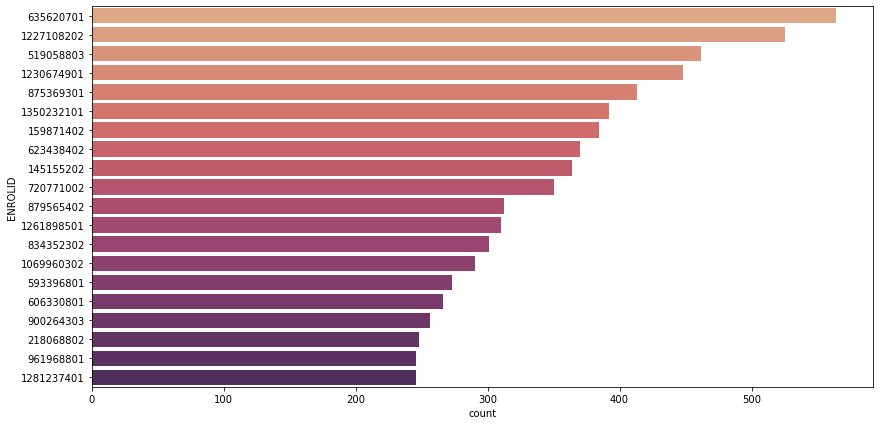

In [23]:
plt.figure(figsize=(14, 7))
sns.countplot(y=df['ENROLID'], order=df.ENROLID.value_counts().iloc[:20].index, 
              palette = 'flare', data=df)

### Age Distribution

<AxesSubplot:xlabel='AGE', ylabel='Count'>

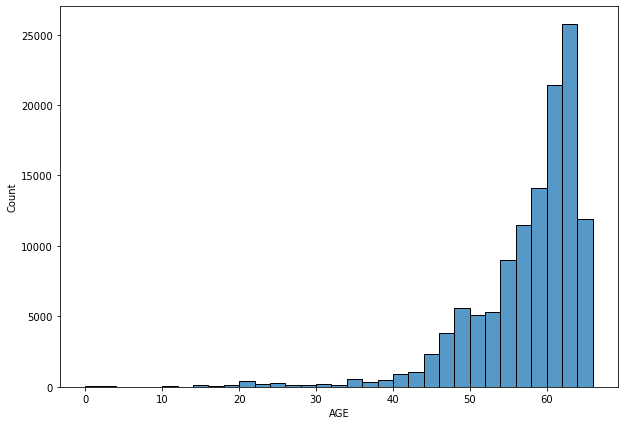

In [24]:
plt.figure(figsize=(10, 7))
sns.histplot(df['AGE'],binwidth=2)

### Density of Age vs Sex

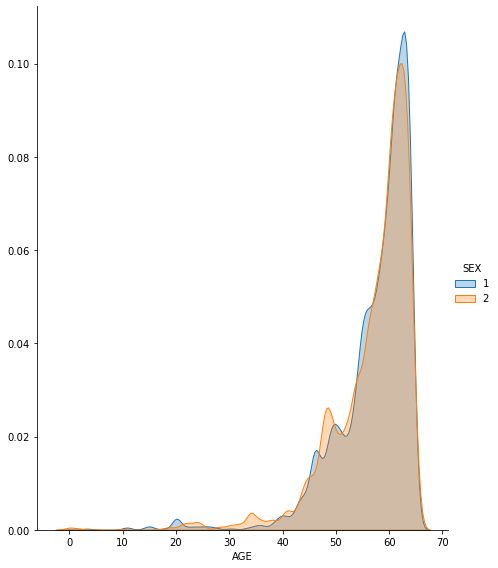

In [25]:
g = sns.FacetGrid(df, hue='SEX', size = 8, height = 4, aspect=0.8)
g = g.map(sns.kdeplot, 'AGE', shade=True, alpha=0.3)
g.add_legend()

## Data Cleansing

### Replace Diagnosis Code Start with I to '999' (Heart Disease code start with I )

In [31]:
# df[col].apply(lambda x: '999' x.startswith(i))

In [32]:
df.loc[df['DX2'].str.startswith('I'), 'DX2'] = '99999'
df.loc[df['DX3'].str.startswith('I'), 'DX3'] = '99999'
df.loc[df['DX4'].str.startswith('I'), 'DX4'] = '99999'
df.loc[df['DX5'].str.startswith('I'), 'DX5'] = '99999'
df.loc[df['DX6'].str.startswith('I'), 'DX6'] = '99999'
df.loc[df['DX7'].str.startswith('I'), 'DX7'] = '99999'
df.loc[df['DX8'].str.startswith('I'), 'DX8'] = '99999'
df.loc[df['DX9'].str.startswith('I'), 'DX9'] = '99999'
df.loc[df['DX10'].str.startswith('I'), 'DX10'] = '99999'
df.loc[df['DX11'].str.startswith('I'), 'DX11'] = '99999'
df.loc[df['DX12'].str.startswith('I'), 'DX12'] = '99999'
df.loc[df['DX13'].str.startswith('I'), 'DX13'] = '99999'
df.loc[df['DX14'].str.startswith('I'), 'DX14'] = '99999'
df.loc[df['DX15'].str.startswith('I'), 'DX15'] = '99999'

#### Making a vector

- If DX1 - DX15 have diagnosis codes start with [A, B, C, D...]
- Then create a vector A, B, C, D as non heart disease factor

In [33]:
# There should be a smarter way, I did manually

# df['I_1'] = df['DX1'].apply(lambda x: 9999 if x =='999' else 0)
# df['I_2'] = df['DX2'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_3'] = df['DX3'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_4'] = df['DX4'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_5'] = df['DX5'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_6'] = df['DX6'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_7'] = df['DX7'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_8'] = df['DX8'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_9'] = df['DX9'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_10'] = df['DX10'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_11'] = df['DX11'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_12'] = df['DX12'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_13'] = df['DX13'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_14'] = df['DX14'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_15'] = df['DX15'].apply(lambda x: 9999 if x == '999' else 0)


In [34]:
# df['I'] = (df['I_1'] + df['I_2'] + df['I_3'] + df['I_4'] + df['I_5'] +
#                  df['I_6'] + df['I_7'] + df['I_8'] + df['I_9'] + df['I_10'] + 
#                  df['I_11'] + df['I_12'] + df['I_13'] + df['I_14'] + df['I_15'])

In [35]:
df.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
1604,132687801,1958,2019,61,I132,I132,99999,99999,J9601,Z6841,N185,L97421,L97529,J810,99999,E1122,99999,E11621,99999,E872,1,169750111,NOVOLOG
1605,132687801,1958,2019,61,I130,I130,E872,99999,99999,N184,99999,99999,E1165,D631,E1122,N185,99999,999,999,999,1,169750111,NOVOLOG
1607,133117002,1963,2019,56,J9601,J9601,E875,99999,99999,N186,99999,R079,R918,E1122,R739,E1165,D631,E876,E8339,E8779,2,169750111,NOVOLOG
1608,133117002,1963,2019,56,A419,A419,A0472,99999,99999,N186,99999,R079,R1084,R109,R112,99999,R1011,Z136,E0842,E782,2,169750111,NOVOLOG
1609,133276802,1959,2019,59,K5732,K5732,99999,99999,99999,J449,999,999,999,999,999,999,999,999,999,999,1,169750111,NOVOLOG


In [ ]:
# drop all the temp columns

# # only can drop 3 columns at a time, otherwise will crash the program
# cols = [x for x in df.columns if x.startswith('I_')]

# df.drop(cols, axis=1, inplace=True)

In [ ]:
df['I'] = df['I'].apply(lambda x: 1 if x > 59994 else 0)

In [ ]:
df.head()

#### Save cleaned dataset to csv

In [ ]:
# df.to_csv('2019_cleaned_data.csv')


### Load Cleaned 2019 data1m

In [39]:
df = pd.read_csv('2019_cleaned_data.csv', index_col = 0)
df.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME,A,B,C,D,E,F,G,H,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,I
1604,132687801,1958,2019,61,I132,999,999,999,J9601,Z6841,N185,L97421,L97529,J810,999,E1122,999,E11621,999,E872,1,169750111,NOVOLOG,0,0,0,0,3,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1605,132687801,1958,2019,61,I130,999,E872,999,999,N184,999,999,E1165,D631,E1122,N185,999,999,999,999,1,169750111,NOVOLOG,0,0,0,1,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
1607,133117002,1963,2019,56,J9601,J9601,E875,999,999,N186,999,R079,R918,E1122,R739,E1165,D631,E876,E8339,E8779,2,169750111,NOVOLOG,0,0,0,1,6,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0
1608,133117002,1963,2019,56,A419,A419,A0472,999,999,N186,999,R079,R1084,R109,R112,999,R1011,Z136,E0842,E782,2,169750111,NOVOLOG,3,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,1,0
1609,133276802,1959,2019,59,K5732,K5732,999,999,999,J449,999,999,999,999,999,999,999,999,999,999,1,169750111,NOVOLOG,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Drop all decoded Columns

In [ ]:
cols = [x for x in df.columns if x.startswith('DX')]
cols

In [ ]:
df = df.drop(columns = cols)


In [ ]:
# drop categorical columns
df = df.drop(columns=['PDX', 'PRODNME'])

In [166]:
# df['Factors Influencing Health Status (Z)'] = df['Z'] 


In [168]:
# df.drop(columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 
#                    'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 
#                    'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], inplace = True)

In [169]:
df.head()

,ENROLID,DOBYR,YEAR,AGE,SEX,NDCNUM,Infectious and Parasitic Diseases(A & B),Neoplasms(C),Neoplasms Blood Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid Process(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Subcutaneous Tissue(L),Musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
1604,132687801,1958,2019,61,1,169750111,0,0,0,3,0,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0,1
1605,132687801,1958,2019,61,1,169750111,0,0,1,3,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
1607,133117002,1963,2019,56,2,169750111,0,0,1,6,0,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0
1608,133117002,1963,2019,56,2,169750111,3,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,1
1609,133276802,1959,2019,59,1,169750111,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


### Save as CSV file only contains Numerical Data

In [3]:
#df.to_csv('2019_cleaned_numerical.csv')
df = pd.read_csv('2019_cleaned_numerical.csv', index_col = 0)
df.head()

,ENROLID,DOBYR,YEAR,AGE,SEX,NDCNUM,Infectious and Parasitic Diseases(A & B),Neoplasms(C),Neoplasms Blood Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid Process(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Subcutaneous Tissue(L),Musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
1604,132687801,1958,2019,61,1,169750111,0,0,0,3,0,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0,1
1605,132687801,1958,2019,61,1,169750111,0,0,1,3,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
1607,133117002,1963,2019,56,2,169750111,0,0,1,6,0,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0
1608,133117002,1963,2019,56,2,169750111,3,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,1
1609,133276802,1959,2019,59,1,169750111,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


#### Plot Patient who diagnosis with A (Infectious and Parasitic Diseases)

In [4]:
grouped_a = df.groupby('ENROLID')['Infectious and Parasitic Diseases(A & B)'].value_counts()
grouped_b = df.groupby('ENROLID')['Neoplasms(C)'].value_counts()
grouped_c = df.groupby('ENROLID')['Neoplasms Blood Blood-forming Organs(D)'].value_counts()
grouped_d = df.groupby('ENROLID')['Endocrine Nutritional Metabolic(E)'].value_counts()
grouped_e = df.groupby('ENROLID')['Mental Behavioral Disorders(F)'].value_counts()
grouped_f = df.groupby('ENROLID')['Nervous System(G)'].value_counts()
grouped_g = df.groupby('ENROLID')['Eye Adnexa, Ear and Mastoid Process(H)'].value_counts()
grouped_h = df.groupby('ENROLID')['Respiratory System(J)'].value_counts()
grouped_J = df.groupby('ENROLID')['Digestive System(K)'].value_counts()

grouped_code = [grouped_a, grouped_b, grouped_c, grouped_d,grouped_e,
               grouped_f, grouped_g,grouped_h, grouped_J]


### Patient who diagnosis with Infectious and Parasitic Diseases

Text(0.5, 1.0, 'Infectious and Parasitic Diseases')

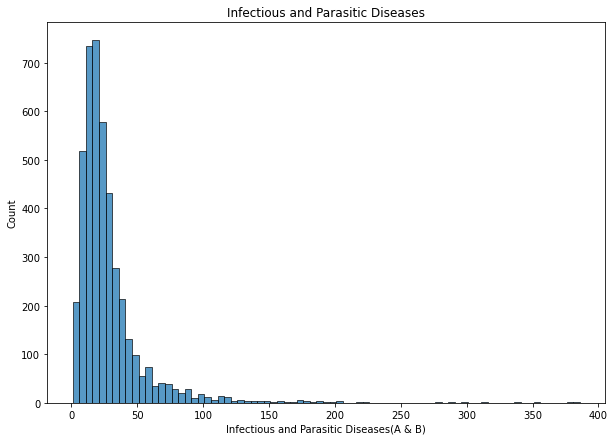

In [5]:
plt.figure(figsize = (10, 7))
ax = sns.histplot(x=grouped_a, binwidth=5, data=df)
ax.set_title('Infectious and Parasitic Diseases')

### Patient who diagnosis with different diseases

In [6]:

col_names = ['Infectious and Parasitic Diseases', 'Infectious and Parasitic Diseases', 'Neoplasms',
            'Neoplasms', 'Endocrine,Nutritional, Metabolic', 'Mental and Behavioral Disorders',
            'Nervous System', 'Eye and Adnexa, Ear and Mastoid Process', 'Respiratory System']
cat_colors = ['rocket', 'viridis', 'Set2', 'Blues_r', 'Oranges_r', 'autumn_r', 'icefire_r', 'summer','icefire_r']

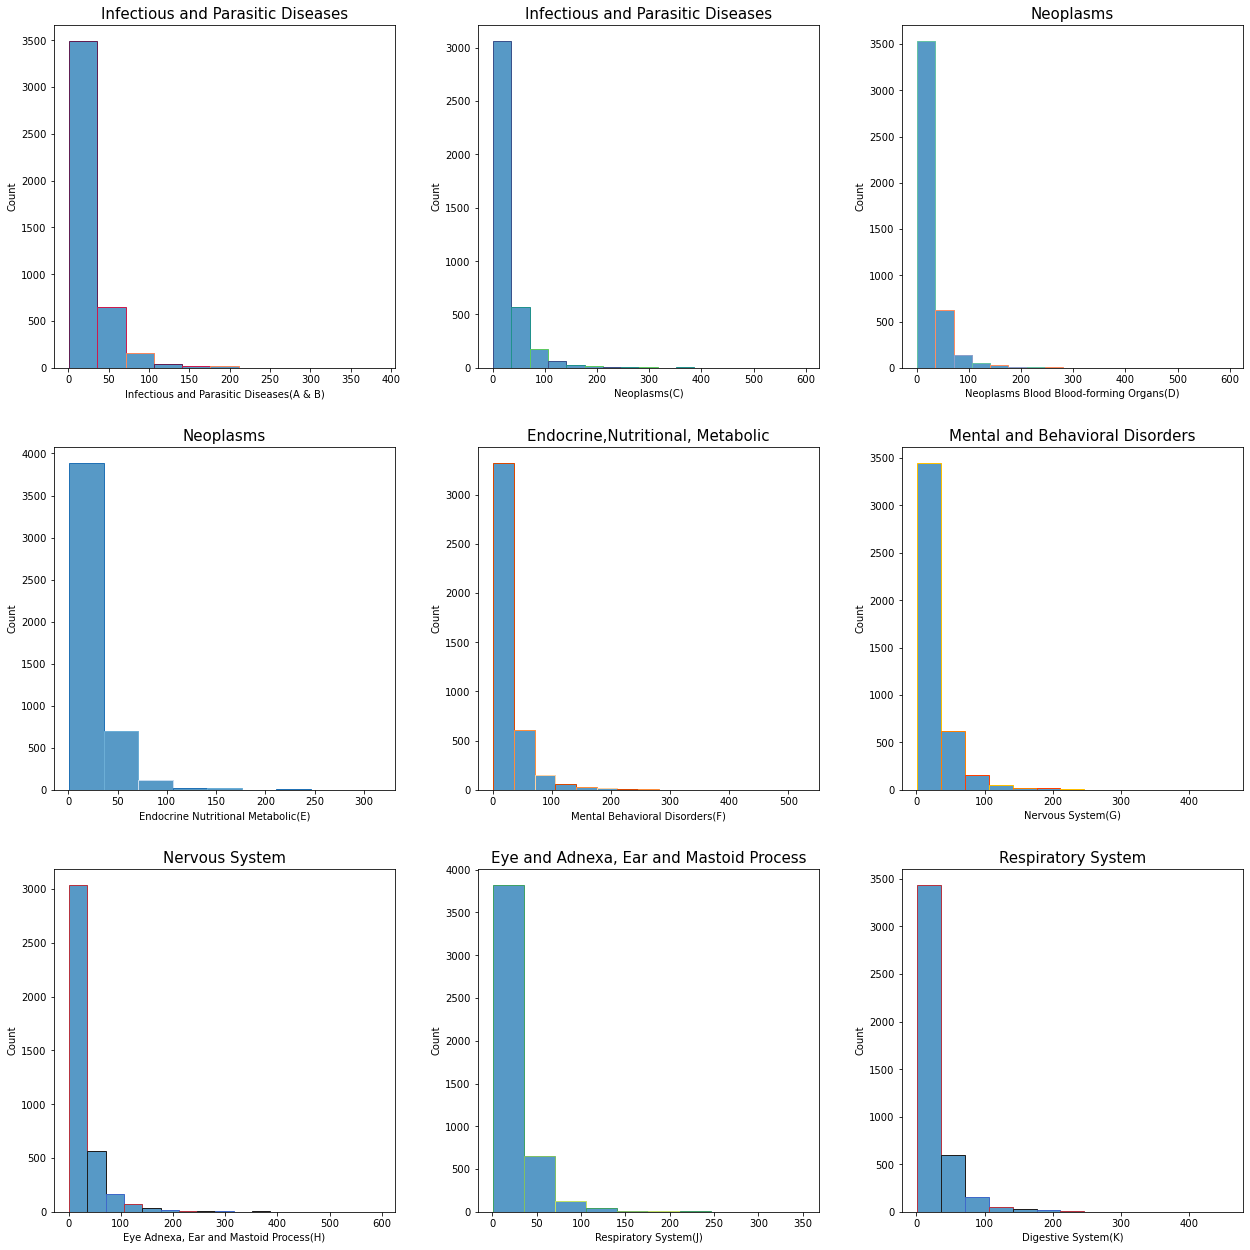

In [7]:
fig, axes = plt.subplots(3,3, figsize=(18,18))
position = 0

for row in range(3):
    for col in range(3):
        
        axes[row, col].set_title(col_names[position],fontdict={'fontsize': 15})
        
        sns.histplot(x=grouped_code[position],
                      palette = cat_colors[position], 
                      edgecolor = sns.color_palette(cat_colors[position], 3),
                      binwidth = 35, 
                      ax = axes[row,col],
                      data=df)
        
     
        
        position+= 1
        

plt.tight_layout(pad=3);

### Age vs Disease code

Text(0.5, 1.0, 'Circulatory System vs Age')

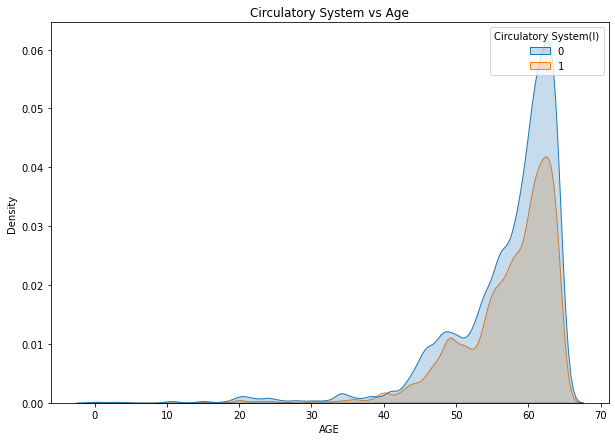

In [8]:

plt.figure(figsize = (10, 7))
ax = sns.kdeplot(x = 'AGE', hue='Circulatory System(I)', fill=True, data=df)
ax.set_title('Circulatory System vs Age')

### Symptoms, Signs and Abnormal Clinical and Lab Findings (R) Vs. Heart Disease (I)

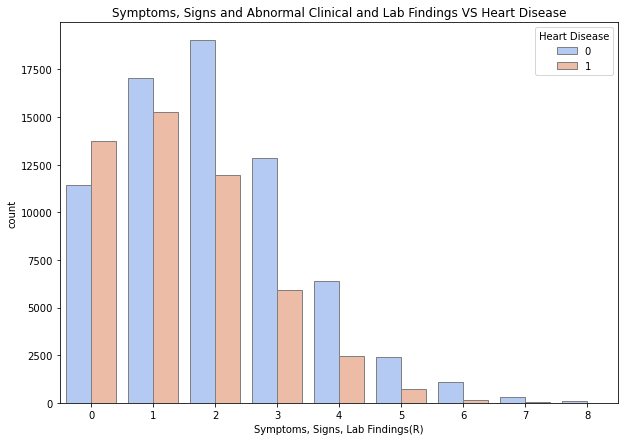

In [9]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x = 'Symptoms, Signs, Lab Findings(R)', hue='Circulatory System(I)', fill=True, palette='coolwarm',edgecolor=".5", data=df)
ax.set_title('Symptoms, Signs and Abnormal Clinical and Lab Findings VS Heart Disease')
plt.legend(loc='upper right', title='Heart Disease')

### Patients vs. Heart Disease

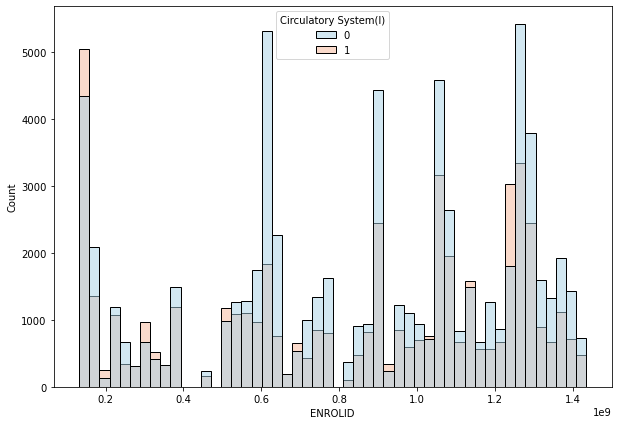

In [10]:
plt.figure(figsize = (10, 7))
sns.histplot(x = df.ENROLID, hue='Circulatory System(I)', palette = 'RdBu_r', data=df)
ax.set_title('Patients(ENROLID) VS Heart Disease')
ax.legend(loc='upper right', title='Heart Disease')

### Percentage of Male and Female

In [11]:
countFemale = len(df[df.SEX == 2])
countMale = len(df[df.SEX == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.SEX))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.SEX))*100)))

Percentage of Female Patients: 44.79%
Percentage of Male Patients: 55.21%


### Percentage of Heart Disease

In [12]:
countNoDisease = len(df[df['Circulatory System(I)'] == 0 ])
countHaveDisease = len(df[df['Circulatory System(I)'] == 1 ])
total = len(df['Circulatory System(I)'])

print("Percentage of Patients No Heart Disease: {:.2f}%".format((countNoDisease / total)*100))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / total )*100))

Percentage of Patients No Heart Disease: 58.41%
Percentage of Patients Have Heart Disease: 41.59%


### Gender with Heart disease

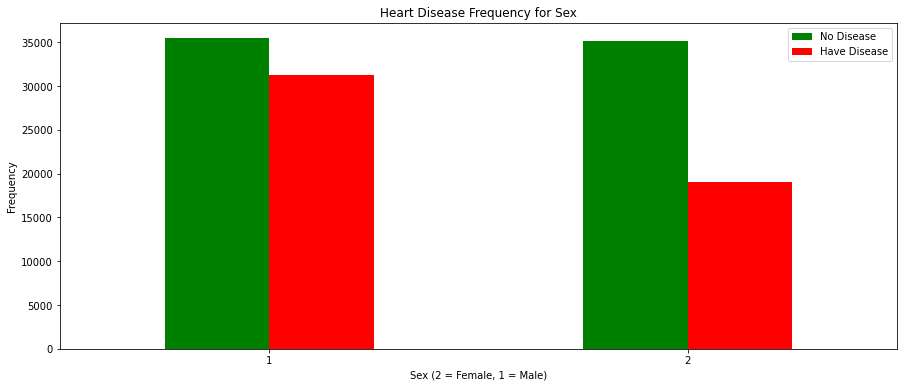

In [13]:
pd.crosstab(df.SEX,df['Circulatory System(I)']).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (2 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### Enrollee with Heart Disease for Age

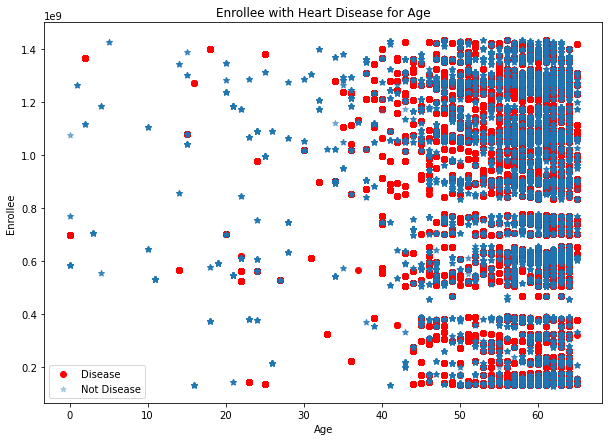

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(x=df.AGE[df['Circulatory System(I)']==1], y=df.ENROLID[(df['Circulatory System(I)']==1)], c="red")
plt.scatter(x=df.AGE[df['Circulatory System(I)']==0], y=df.ENROLID[(df['Circulatory System(I)']==0)],alpha=0.3, marker="*", linewidth=1)
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Enrollee ")
plt.title('Enrollee with Heart Disease for Age')
plt.show()

<AxesSubplot:>

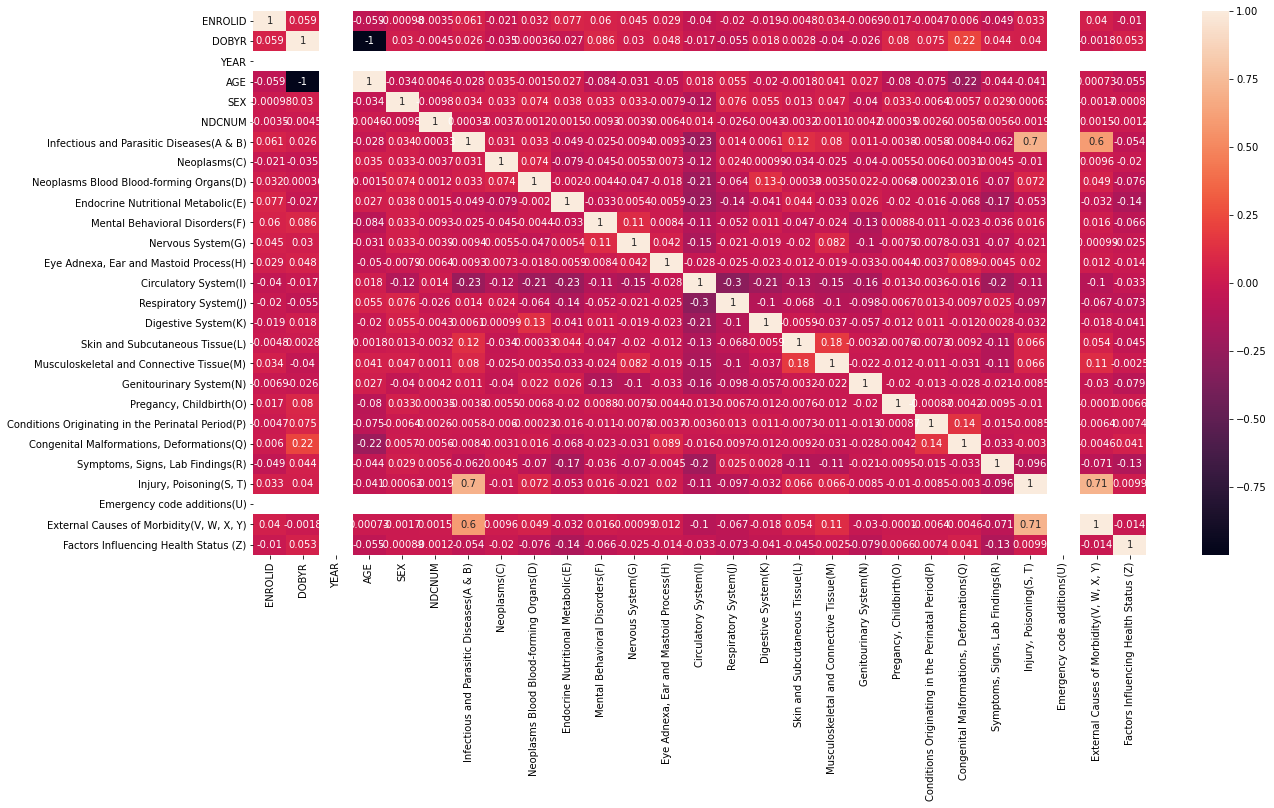

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

#  Load 2020 Dataset

In [16]:
df20 = pd.read_csv('2020_data.csv', index_col = 0)

In [17]:
df20.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
2503,133117002.0,1963.0,2020.0,57.0,E1143,E1143,E1122,I132,I5032,N186,R109,R112,Z136,I120,R110,K3184,NaN,NaN,NaN,NaN,2.0,169750111.0,NOVOLOG
2504,133117002.0,1963.0,2020.0,57.0,E1310,E1310,E1110,I132,I5032,N186,R188,R198,R531,S3992XA,I120,R109,R1011,E1010,D649,R1110,2.0,169750111.0,NOVOLOG
2505,133117002.0,1963.0,2020.0,57.0,E1010,E1010,I132,I5032,N186,N3000,E1110,E875,E1343,I120,E785,K3184,NaN,NaN,NaN,NaN,2.0,169750111.0,NOVOLOG
2506,133117002.0,1963.0,2020.0,57.0,E1143,E1143,I132,I5032,K3184,N186,R1110,R1115,R918,E875,E1165,R112,N189,R188,N2581,R197,2.0,169750111.0,NOVOLOG
2507,133117002.0,1963.0,2020.0,57.0,E1310,E1310,E1110,G9341,I132,I5032,N186,E1010,E871,E872,E875,E876,Z992,NaN,NaN,NaN,2.0,169750111.0,NOVOLOG


In [18]:
df20.tail()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
4979039,1.845493e+09,1957.0,2020.0,62.0,A414,A414,A0472,D649,E119,E43,E871,I471,I69354,J189,R918,R0902,R9431,D72829,I509,R509,1.0,7.128800e+10,CEFEPIME
4979043,1.845493e+09,1957.0,2020.0,62.0,A414,A414,A0472,D649,E119,E43,E871,I471,I69354,J189,R918,R0902,R9431,D72829,I509,R509,1.0,3.380017e+08,DEXTROSE
4979051,1.858879e+09,1963.0,2020.0,56.0,R197,R197,F329,G43909,G4733,I10,I25811,K219,M797,R7303,R918,Z941,I509,NaN,NaN,NaN,2.0,6.931502e+10,NU-MAG
4979055,1.867381e+09,1984.0,2020.0,36.0,I420,I420,I110,I5021,I509,R0602,R000,R05,R0789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.928109e+10,IPOL
4979087,1.904852e+09,1979.0,2020.0,41.0,I9589,I9589,I110,I509,I9788,K219,K559,N186,T8612,Z885,I959,K921,R578,Z452,I950,T82868A,1.0,9.046819e+08,MIDODRINE HCL


In [19]:
df20.shape   # 2019 120934 rows

(132113, 23)

## Data type

In [20]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132113 entries, 2503 to 4979087
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ENROLID  132113 non-null  float64
 1   DOBYR    132113 non-null  float64
 2   YEAR     132113 non-null  float64
 3   AGE      132113 non-null  float64
 4   PDX      132113 non-null  object 
 5   DX1      132113 non-null  object 
 6   DX2      132113 non-null  object 
 7   DX3      132092 non-null  object 
 8   DX4      132090 non-null  object 
 9   DX5      132044 non-null  object 
 10  DX6      131329 non-null  object 
 11  DX7      130793 non-null  object 
 12  DX8      129741 non-null  object 
 13  DX9      128276 non-null  object 
 14  DX10     125371 non-null  object 
 15  DX11     121834 non-null  object 
 16  DX12     117280 non-null  object 
 17  DX13     111597 non-null  object 
 18  DX14     104859 non-null  object 
 19  DX15     97389 non-null   object 
 20  SEX      132113 non-nu

## Convert float type to integer

In [21]:
df20[['ENROLID', 'DOBYR', 'YEAR', 'AGE', 'SEX', 'NDCNUM']] = df20[['ENROLID', 'DOBYR', 'YEAR', 'AGE', 'SEX', 'NDCNUM']].astype(int)

In [22]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132113 entries, 2503 to 4979087
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ENROLID  132113 non-null  int64 
 1   DOBYR    132113 non-null  int64 
 2   YEAR     132113 non-null  int64 
 3   AGE      132113 non-null  int64 
 4   PDX      132113 non-null  object
 5   DX1      132113 non-null  object
 6   DX2      132113 non-null  object
 7   DX3      132092 non-null  object
 8   DX4      132090 non-null  object
 9   DX5      132044 non-null  object
 10  DX6      131329 non-null  object
 11  DX7      130793 non-null  object
 12  DX8      129741 non-null  object
 13  DX9      128276 non-null  object
 14  DX10     125371 non-null  object
 15  DX11     121834 non-null  object
 16  DX12     117280 non-null  object
 17  DX13     111597 non-null  object
 18  DX14     104859 non-null  object
 19  DX15     97389 non-null   object
 20  SEX      132113 non-null  int64 
 21  NDCNUM

### Unique Values

The reason that so many duplicates, the same patient can have multiple diagnosis

In [23]:
df20.nunique()

ENROLID    4439
DOBYR        62
YEAR          1
AGE          62
PDX        1019
DX1        1019
DX2         719
DX3         759
DX4         845
DX5         914
DX6         972
DX7        1073
DX8        1126
DX9        1153
DX10       1124
DX11       1069
DX12       1075
DX13       1097
DX14       1084
DX15       1013
SEX           2
NDCNUM     9012
PRODNME    1515
dtype: int64

# Exploratory Data Analysis

### Top 10 patient who had most diagnosis in 2020

In [11]:
df20['ENROLID'].value_counts().to_frame().head(10)

,ENROLID
1114797401,658
1665292902,570
1845430402,480
135893702,456
1421256502,399
1362573702,365
1267066802,364
1639490701,350
159871402,344
1905096602,343


### Top 10 most used drugs in 2020

In [12]:
df20['PRODNME'].value_counts().to_frame().head(10)

,PRODNME
ATORVASTATIN CALCIUM,4101
CARVEDILOL,4027
FUROSEMIDE,3329
METOPROLOL SUCCINATE,3196
POTASSIUM CHLORIDE,2669
LISINOPRIL,2599
SPIRONOLACTONE,2258
PREDNISONE,2172
HYDROCODONE BITARTRATE-ACETAMINOPHEN,2124
LOSARTAN POTASSIUM,2104


### Medication each patient took in 2020

In [13]:
df20.groupby('ENROLID')['PRODNME'].value_counts().to_frame().head(20)

PRODNME
ENROLID   PRODNME                                                    
132687801 BUMETANIDE                                                1
          CARVEDILOL                                                1
          CHLORTHALIDONE                                            1
          DOXYCYCLINE HYCLATE                                       1
          LOKELMA                                                   1
132823101 CARISOPRODOL                                              3
          HYDROCODONE BITARTRATE-ACETAMINOPHEN                      3
          SERTRALINE HCL                                            3
          AMLODIPINE BESYLATE                                       2
          FLUCONAZOLE                                               2
          HYDROCODONE POLISTIREX-CHLORPHENIRAMINE POLISTIREX        2
          HYDROXYZINE PAMOATE                                       2
          LOSARTAN POTASSIUM                                        2
          POTASSIUM CHLORIDE                                        2
          AMOXICILLIN/CLAVULANATE POTASSIUM                         1
          AZITHROMYCIN                                              1
          BUMETANIDE                                                1
          CARVEDILOL                                                1
          CLINDAMYCIN HCL                                           1
          DULOXETINE HCL                                            1

### Missing values

In [14]:
df20.isnull().sum()

ENROLID        0
DOBYR          0
YEAR           0
AGE            0
PDX            0
DX1            0
DX2            0
DX3           21
DX4           23
DX5           69
DX6          784
DX7         1320
DX8         2372
DX9         3837
DX10        6742
DX11       10279
DX12       14833
DX13       20516
DX14       27254
DX15       34724
SEX            0
NDCNUM         0
PRODNME        0
dtype: int64

#### Visuallize the null value

<AxesSubplot:>

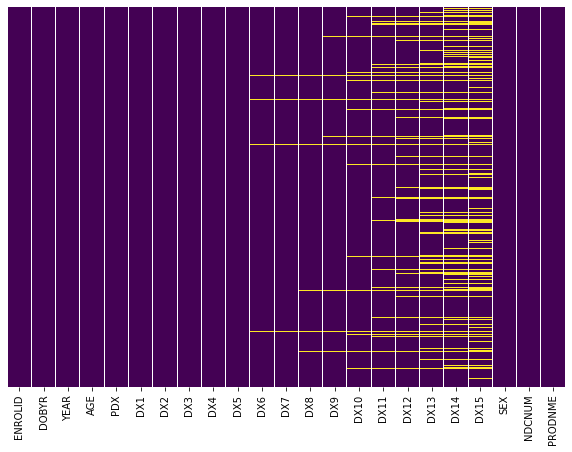

In [15]:
plt.figure(figsize = (10, 7))
sns.heatmap(df20.isnull(), yticklabels=False, cbar = False, cmap='viridis')

#### Fill null value with '999'

In [16]:
df20 = df20.fillna('999')

### Visualize the null value again

<AxesSubplot:>

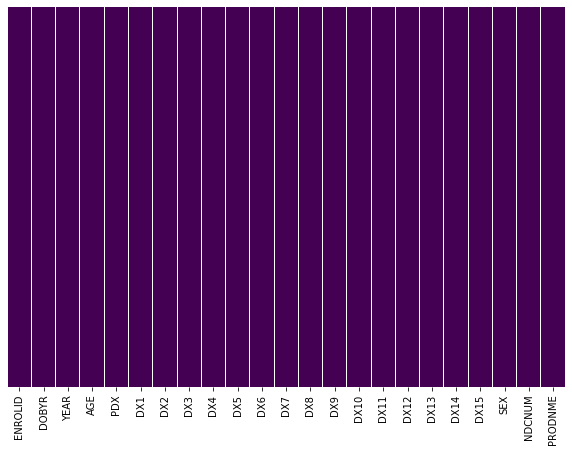

In [17]:
plt.figure(figsize = (10, 7))
sns.heatmap(df20.isnull(), yticklabels=False, cbar = False, cmap='viridis')

## Plots

#### Countplot of diagnosis codes relate to heart disease

In [18]:
# DX1
dx = df20.loc[df20['DX1'].str.startswith('I')]
dx['DX1'].value_counts()

I110      11906
I130      11178
I214       4061
I132       2752
I480       2134
          ...  
I970          2
I63513        2
I050          2
I87312        2
I6031         1
Name: DX1, Length: 205, dtype: int64

##### DX1 heart disease code base on the gender

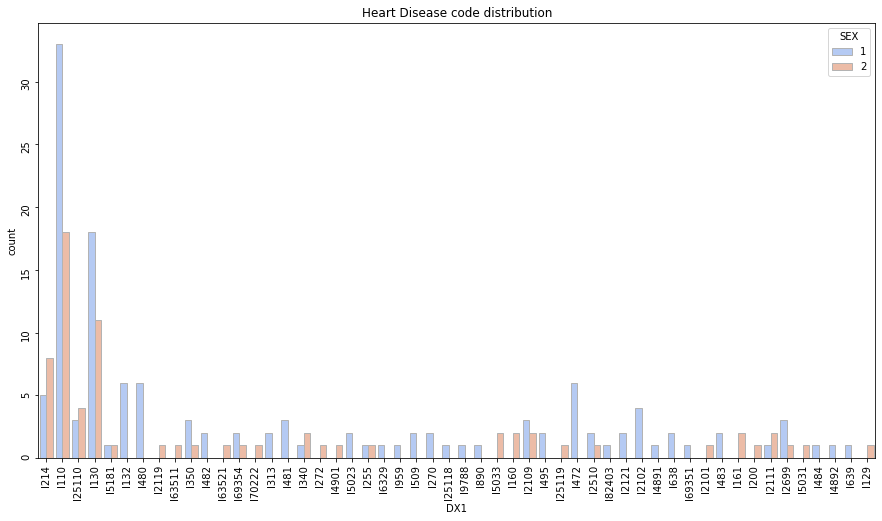

In [19]:
# DX1 
plt.figure(figsize=(15, 8))

sns.countplot(x=dx['DX1'][:200], hue='SEX', edgecolor=".7", palette='coolwarm', data=df20)
plt.tick_params(labelrotation=90)
plt.title('Heart Disease code distribution')
plt.legend(loc='upper right', title='SEX')

### All disease code in DX2-15

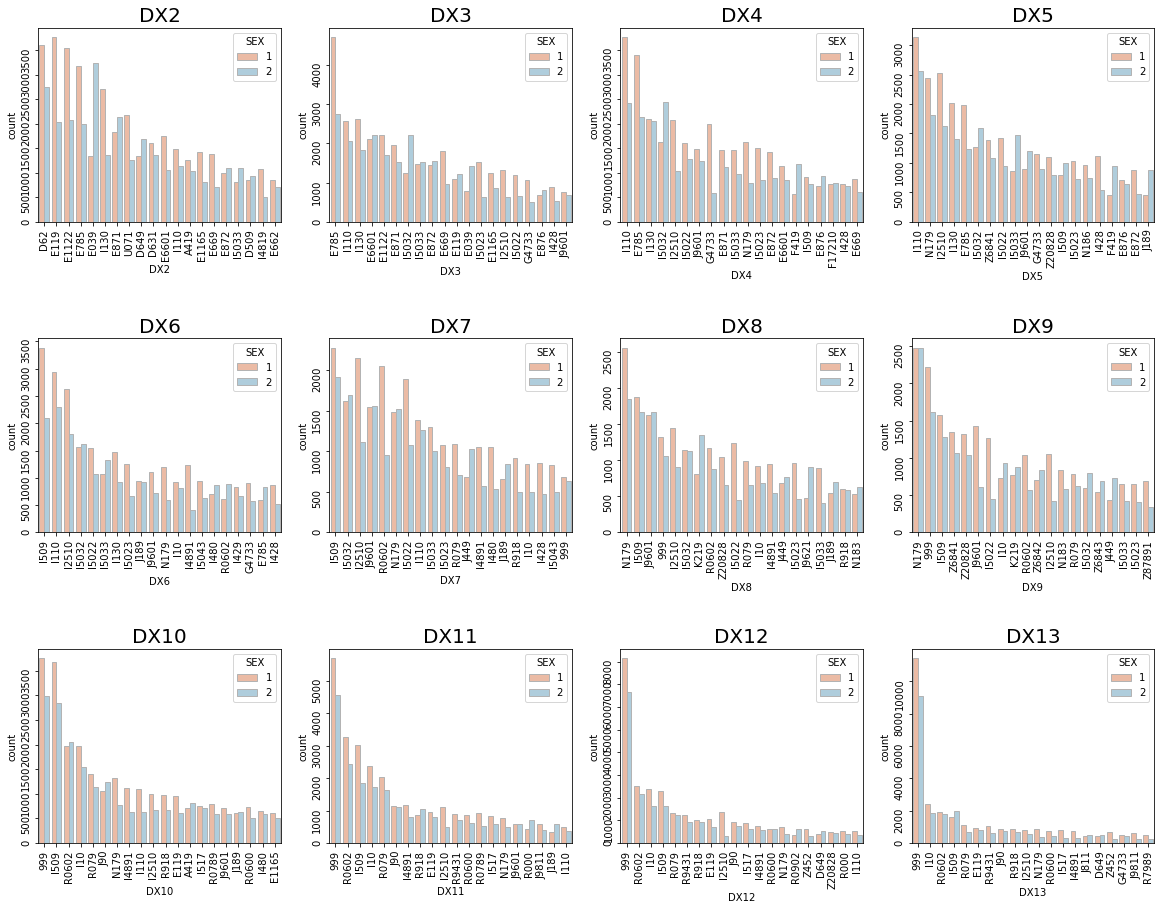

In [20]:
dx_code = [x for x in df20.columns if x.startswith('DX')]

fig, ax = plt.subplots(3, 4, figsize=(20, 15))
ax = ax.ravel()
position = 0

for i in dx_code[1:13]:
    order = df20[i].value_counts().iloc[:20].index
    sns.countplot(x=i, ax=ax[position], hue='SEX',edgecolor=".7", palette='RdBu', order=order, data=df20)
    ax[position].tick_params(labelrotation=90)

    ax[position].set_title(i, fontdict={'fontsize': 20})
    position += 1
    
plt.subplots_adjust(hspace=0.6)
plt.show()

### Top 20 Most used Drugs 

Text(0.5, 1.0, 'Top 20 Most Used Drugs of 2020')

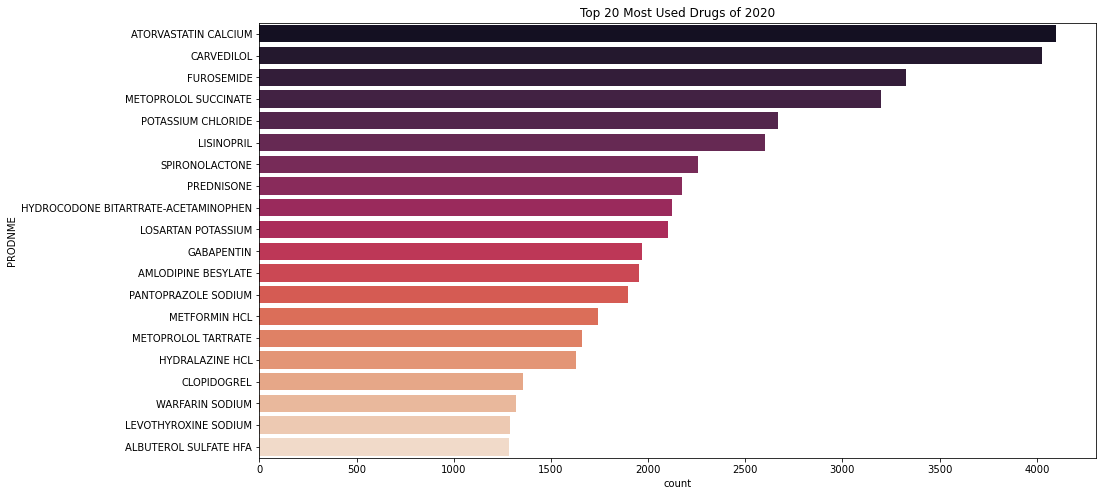

In [21]:
plt.figure(figsize=(15, 8))
sns.countplot(y=df20['PRODNME'], order=df20.PRODNME.value_counts().iloc[:20].index, 
              palette = 'rocket', data=df20)
plt.title('Top 20 Most Used Drugs of 2020')

### Top 20 Most Frequent Patients

Text(0.5, 1.0, 'Top 20 Most Frequent Patients of 2020')

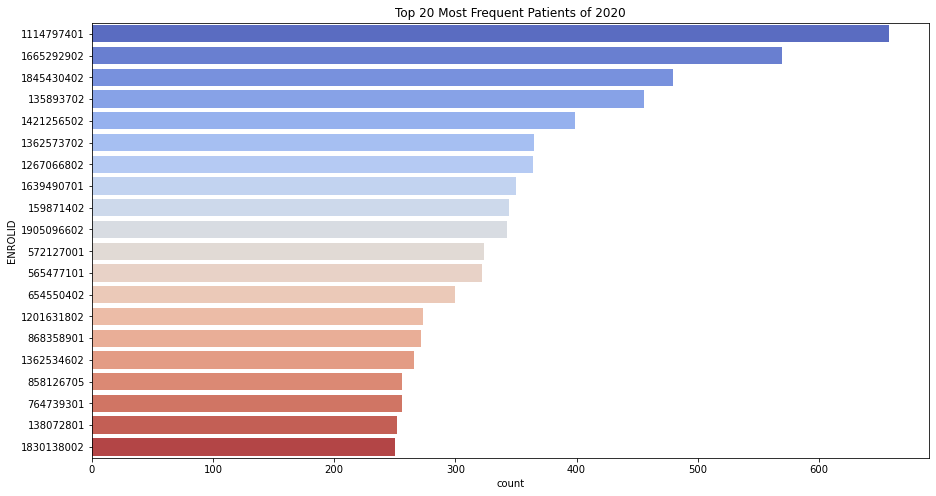

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(y=df20['ENROLID'], order=df20.ENROLID.value_counts().iloc[:20].index, 
              palette = 'coolwarm', data=df20)
plt.title('Top 20 Most Frequent Patients of 2020')

### Age Distribution

Text(0.5, 1.0, 'Age Distribution of 2020')

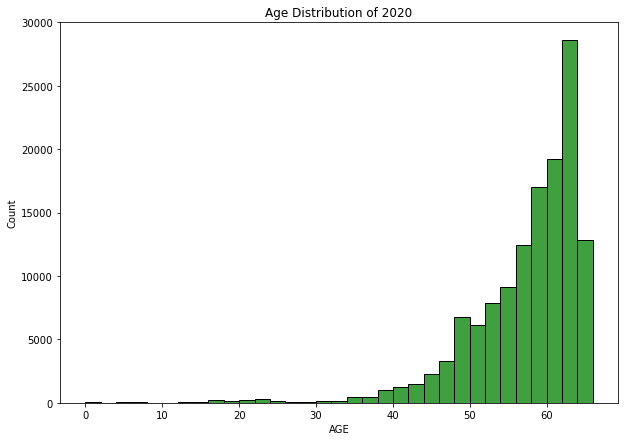

In [23]:
plt.figure(figsize=(10, 7))
sns.histplot(df20['AGE'],binwidth=2, color='green')
plt.title('Age Distribution of 2020')

### Density of Age vs Sex

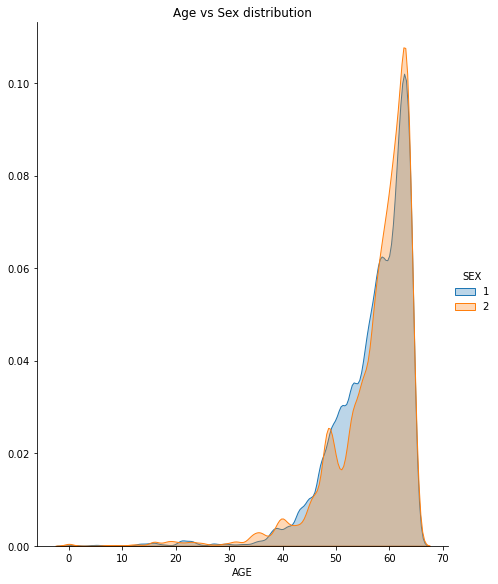

In [24]:
g = sns.FacetGrid(df20, hue='SEX', size = 8, height = 4, aspect=0.8)
g = g.map(sns.kdeplot, 'AGE', shade=True, alpha=0.3)
plt.title('Age vs Sex distribution')
g.add_legend()

## Data Cleansing

### Make Vectors

In [80]:
### hard coded, J couldn't figure out a smarter way
# df20['H_1'] = df20['DX1'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_2'] = df20['DX2'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_3'] = df20['DX3'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_4'] = df20['DX4'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_5'] = df20['DX5'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_6'] = df20['DX6'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_7'] = df20['DX7'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_8'] = df20['DX8'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_9'] = df20['DX9'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_10'] = df20['DX10'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_11'] = df20['DX11'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_12'] = df20['DX12'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_13'] = df20['DX13'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_14'] = df20['DX14'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['H_15'] = df20['DX15'].apply(lambda x: 1 if x.startswith('H') else 0)
# df20['I_1'] = df20['DX1'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_2'] = df20['DX2'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_3'] = df20['DX3'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_4'] = df20['DX4'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_5'] = df20['DX5'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_6'] = df20['DX6'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_7'] = df20['DX7'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_8'] = df20['DX8'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_9'] = df20['DX9'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_10'] = df20['DX10'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_11'] = df20['DX11'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_12'] = df20['DX12'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_13'] = df20['DX13'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_14'] = df20['DX14'].apply(lambda x: 1 if x.startswith('I') else 0)
# df20['I_15'] = df20['DX15'].apply(lambda x: 1 if x.startswith('I') else 0)

# df20['J_1'] = df20['DX1'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_2'] = df20['DX2'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_3'] = df20['DX3'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_4'] = df20['DX4'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_5'] = df20['DX5'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_6'] = df20['DX6'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_7'] = df20['DX7'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_8'] = df20['DX8'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_9'] = df20['DX9'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_10'] = df20['DX10'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_11'] = df20['DX11'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_12'] = df20['DX12'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_13'] = df20['DX13'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_14'] = df20['DX14'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['J_15'] = df20['DX15'].apply(lambda x: 1 if x.startswith('J') else 0)
# df20['K_1'] = df20['DX1'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_2'] = df20['DX2'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_3'] = df20['DX3'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_4'] = df20['DX4'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_5'] = df20['DX5'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_6'] = df20['DX6'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_7'] = df20['DX7'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_8'] = df20['DX8'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_9'] = df20['DX9'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_10'] = df20['DX10'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_11'] = df20['DX11'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_12'] = df20['DX12'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_13'] = df20['DX13'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_14'] = df20['DX14'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['K_15'] = df20['DX15'].apply(lambda x: 1 if x.startswith('K') else 0)
# df20['L_1'] = df20['DX1'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_2'] = df20['DX2'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_3'] = df20['DX3'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_4'] = df20['DX4'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_5'] = df20['DX5'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_6'] = df20['DX6'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_7'] = df20['DX7'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_8'] = df20['DX8'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_9'] = df20['DX9'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_10'] = df20['DX10'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_11'] = df20['DX11'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_12'] = df20['DX12'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_13'] = df20['DX13'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_14'] = df20['DX14'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['L_15'] = df20['DX15'].apply(lambda x: 1 if x.startswith('L') else 0)
# df20['G_1'] = df20['DX1'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_2'] = df20['DX2'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_3'] = df20['DX3'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_4'] = df20['DX4'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_5'] = df20['DX5'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_6'] = df20['DX6'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_7'] = df20['DX7'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_8'] = df20['DX8'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_9'] = df20['DX9'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_10'] = df20['DX10'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_11'] = df20['DX11'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_12'] = df20['DX12'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_13'] = df20['DX13'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_14'] = df20['DX14'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['G_15'] = df20['DX15'].apply(lambda x: 1 if x.startswith('G') else 0)
# df20['F_1'] = df20['DX1'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_2'] = df20['DX2'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_3'] = df20['DX3'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_4'] = df20['DX4'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_5'] = df20['DX5'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_6'] = df20['DX6'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_7'] = df20['DX7'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_8'] = df20['DX8'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_9'] = df20['DX9'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_10'] = df20['DX10'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_11'] = df20['DX11'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_12'] = df20['DX12'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_13'] = df20['DX13'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_14'] = df20['DX14'].apply(lambda x: 1 if x.startswith('F') else 0)
# df20['F_15'] = df20['DX15'].apply(lambda x: 1 if x.startswith('F') else 0)


In [81]:

# df20['H'] = (df20['H_1'] + df20['H_2'] + df20['H_3'] + df20['H_4'] + df20['H_5'] +
#                  df20['H_6'] + df20['H_7'] + df20['H_8'] + df20['H_9'] + df20['H_10'] + 
#                  df20['H_11'] + df20['H_12'] + df20['H_13'] + df20['H_14'] + df20['H_15'])

# df20['I'] = (df20['I_1'] + df20['I_2'] + df20['I_3'] + df20['I_4'] + df20['I_5'] +
#                  df20['I_6'] + df20['I_7'] + df20['I_8'] + df20['I_9'] + df20['I_10'] + 
#                  df20['I_11'] + df20['I_12'] + df20['I_13'] + df20['I_14'] + df20['I_15'])


# df20['J'] = (df20['J_1'] + df20['J_2'] + df20['J_3'] + df20['J_4'] + df20['J_5'] +
#                  df20['J_6'] + df20['J_7'] + df20['J_8'] + df20['J_9'] + df20['J_10'] + 
#                  df20['J_11'] + df20['J_12'] + df20['J_13'] + df20['J_14'] + df20['J_15'])
# df20['K'] = (df20['K_1'] + df20['K_2'] + df20['K_3'] + df20['K_4'] + df20['K_5'] +
#                  df20['K_6'] + df20['K_7'] + df20['K_8'] + df20['K_9'] + df20['K_10'] + 
#                  df20['K_11'] + df20['K_12'] + df20['K_13'] + df20['K_14'] + df20['K_15'])
# df20['L'] = (df20['L_1'] + df20['L_2'] + df20['L_3'] + df20['L_4'] + df20['L_5'] +
#                  df20['L_6'] + df20['L_7'] + df20['L_8'] + df20['L_9'] + df20['L_10'] + 
#                  df20['L_11'] + df20['L_12'] + df20['L_13'] + df20['L_14'] + df20['L_15'])
# df20['G'] = (df20['G_1'] + df20['G_2'] + df20['G_3'] + df20['G_4'] + df20['G_5'] +
#                  df20['G_6'] + df20['G_7'] + df20['G_8'] + df20['G_9'] + df20['G_10'] + 
#                  df20['G_11'] + df20['G_12'] + df20['G_13'] + df20['G_14'] + df20['G_15'])


In [82]:
# # only can drop 3 columns at a time, otherwise will crash the program
# cols = [x for x in df20.columns if x.startswith('L_')]
# df20.drop(cols, axis=1, inplace=True)

# NOTE: how many dx code contains i to determine I is 1 or 0

### given that dx5 - dx 15 contains so many missing values, 
### maybe if there are more than 2 or 3 dx code have I. then I is 1, otherwise 0, I > 3 == 1, else 0

In [83]:
df20.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
2503,133117002,1963,2020,57,E1143,E1143,E1122,I132,I5032,N186,R109,R112,Z136,I120,R110,K3184,999,999,999,999,2,169750111,NOVOLOG
2504,133117002,1963,2020,57,E1310,E1310,E1110,I132,I5032,N186,R188,R198,R531,S3992XA,I120,R109,R1011,E1010,D649,R1110,2,169750111,NOVOLOG
2505,133117002,1963,2020,57,E1010,E1010,I132,I5032,N186,N3000,E1110,E875,E1343,I120,E785,K3184,999,999,999,999,2,169750111,NOVOLOG
2506,133117002,1963,2020,57,E1143,E1143,I132,I5032,K3184,N186,R1110,R1115,R918,E875,E1165,R112,N189,R188,N2581,R197,2,169750111,NOVOLOG
2507,133117002,1963,2020,57,E1310,E1310,E1110,G9341,I132,I5032,N186,E1010,E871,E872,E875,E876,Z992,999,999,999,2,169750111,NOVOLOG


In [84]:
#df20['Factors Influencing Health Status (Z)'] = df20['Z'] 

In [85]:
# cols = [x for x in df20.columns if x.startswith('DX')]
# df20.drop(cols, axis=1, inplace=True)

### Save as cleaned dataset

In [86]:
# df20.to_csv('2020_cleaned_data.csv')

In [101]:
 df2 = pd.read_csv('2020_cleaned_data.csv', index_col = 0)

In [103]:
df2['I'].value_counts()

4     20937
5     20795
3     19316
6     17150
2     16132
7     12744
8      8720
9      5996
1      5960
10     2967
11      997
12      288
13       77
14       34
Name: I, dtype: int64

In [104]:
df1 = pd.read_csv('2019_cleaned_numerical.csv', index_col = 0)


In [105]:
df1['Circulatory System(I)'].value_counts()

0    70637
1    50297
Name: Circulatory System(I), dtype: int64

In [106]:
df20['Circulatory System(I)'].value_counts()

1    110021
0     22092
Name: Circulatory System(I), dtype: int64

In [96]:
df2['I'] = df2['I'].apply(lambda x: 1 if x > 4 else 0)

In [97]:
df2['I'].value_counts()

1    69768
0    62345
Name: I, dtype: int64

<AxesSubplot:xlabel='I', ylabel='Probability'>

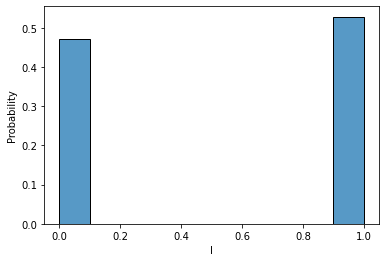

In [98]:
sns.histplot(x = 'I',bins=10,stat = 'probability', data = df2)

In [88]:
# df20.drop(columns=['PDX', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 
#                    'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 
#                    'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
#                    'Factors Influencing Health Status(Z)', 'PRODNME'], inplace = True)

### Save to cleaned Numeric data

In [89]:
# df20.to_csv('2020_cleaned_numeric_data.csv')

In [18]:
df20 = pd.read_csv('2020_cleaned_numeric_data.csv', index_col = 0)
df20.head()

,ENROLID,DOBYR,YEAR,AGE,SEX,NDCNUM,Infectious and Parasitic Diseases(A & B),Neoplasms(C),Neoplasms Blood Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid Process(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Subcutaneous Tissue(L),Musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
2503,133117002,1963,2020,57,2,169750111,0,0,0,2,0,0,0,1,0,1,0,0,1,0,0,0,3,0,0,0,1
2504,133117002,1963,2020,57,2,169750111,0,0,1,3,0,0,0,1,0,0,0,0,1,0,0,0,6,1,0,0,0
2505,133117002,1963,2020,57,2,169750111,0,0,0,5,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0
2506,133117002,1963,2020,57,2,169750111,0,0,0,3,0,0,0,0,0,1,0,0,3,0,0,0,6,0,0,0,0
2507,133117002,1963,2020,57,2,169750111,0,0,0,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### Plot Cleaned data

#### Distribution of total Circulatory System (I) diagnosis

Text(0.5, 1.0, 'Circulatory System Code distribution')

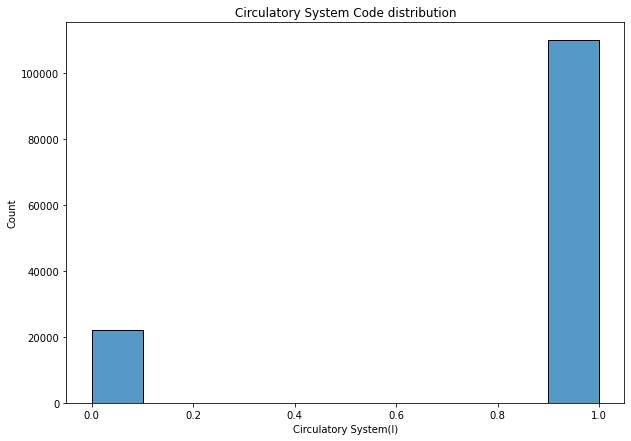

In [19]:
plt.figure(figsize = (10, 7))
sns.histplot(x = 'Circulatory System(I)',bins=10, data = df20)
plt.title('Circulatory System Code distribution')

## Make Circulatory System to Response Variable

### Method 1: 

- By looking at the distribution plot:
- The average range of total disease is between 2.5 to 6
- I am assuming that if it's greater than 3, it's 1 else 0

### Method 2: 

- By looking at the probability plot
- Calculating the percentage of heart and no heart disease 


In [20]:
# Method 1
#df20['Circulatory System(I)'] = df20['Circulatory System(I)'].apply(lambda x: 1 if x >= 3 else 0)

In [21]:
#df20.head()

### Probability Plots of diseases

Text(0.5, 1.0, 'Probability of Heart Disease')

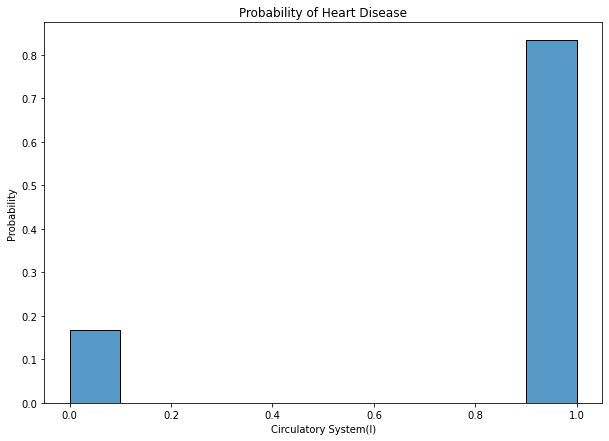

In [22]:
plt.figure(figsize = (10, 7))
sns.histplot(x = 'Circulatory System(I)', bins=10, stat = 'probability', data = df20)
plt.title('Probability of Heart Disease')


### Percentage of Heart Disease

In [23]:
No_heart_disease = len(df20[df20['Circulatory System(I)'] == 0])
heart_disease = len(df20[df20['Circulatory System(I)'] > 0])

print("Percentage of Patients Don't Have Heart Disease: {:.2f}%".format((No_heart_disease / (len(df20['Circulatory System(I)']))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((heart_disease / (len(df20['Circulatory System(I)']))*100)))

Percentage of Patients Don't Have Heart Disease: 16.72%
Percentage of Patients Have Heart Disease: 83.28%


Text(0.5, 1.0, 'Heart Disease Frequency for Sex')

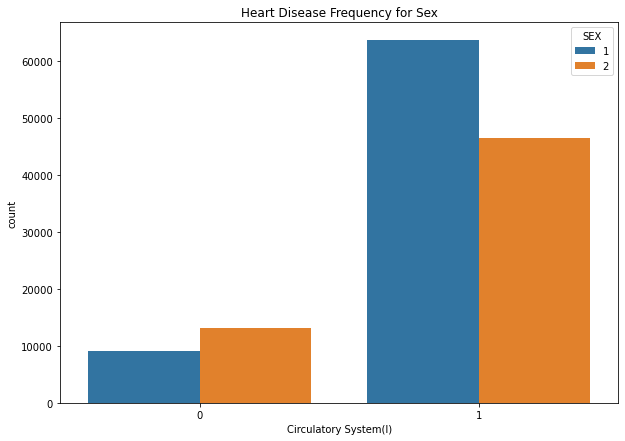

In [24]:
plt.figure(figsize = (10, 7))
sns.countplot(x = 'Circulatory System(I)', hue='SEX', data = df20)
plt.title('Heart Disease Frequency for Sex')

### Patient diagnosis with different disease 

In [25]:
col_names = ['Infectious and Parasitic Diseases(A & B)', 'Neoplasms(C)',
       'Neoplasms Blood Blood-forming Organs(D)',
       'Endocrine Nutritional Metabolic(E)', 'Mental Behavioral Disorders(F)',
       'Nervous System(G)', 'Eye Adnexa, Ear and Mastoid Process(H)',
       #'Circulatory System(I)', 
        'Respiratory System(J)', 'Digestive System(K)',
       'Skin and Subcutaneous Tissue(L)',
       'Musculoskeletal and Connective Tissue(M)', 'Genitourinary System(N)',
       'Pregancy, Childbirth(O)',
       'Conditions Originating in the Perinatal Period(P)',
       'Congenital Malformations, Deformations(Q)',
       'Symptoms, Signs, Lab Findings(R)', 'Injury, Poisoning(S, T)',
       'Emergency code additions(U)',
       'External Causes of Morbidity(V, W, X, Y)',
       'Factors Influencing Health Status (Z)']
cat_colors = ['RdBu_r','coolwarm','vlag', 'autumn_r','RdBu',  'icefire_r','Set2', 'viridis_r', 
               'summer','nipy_spectral','viridis', 'rocket' ]

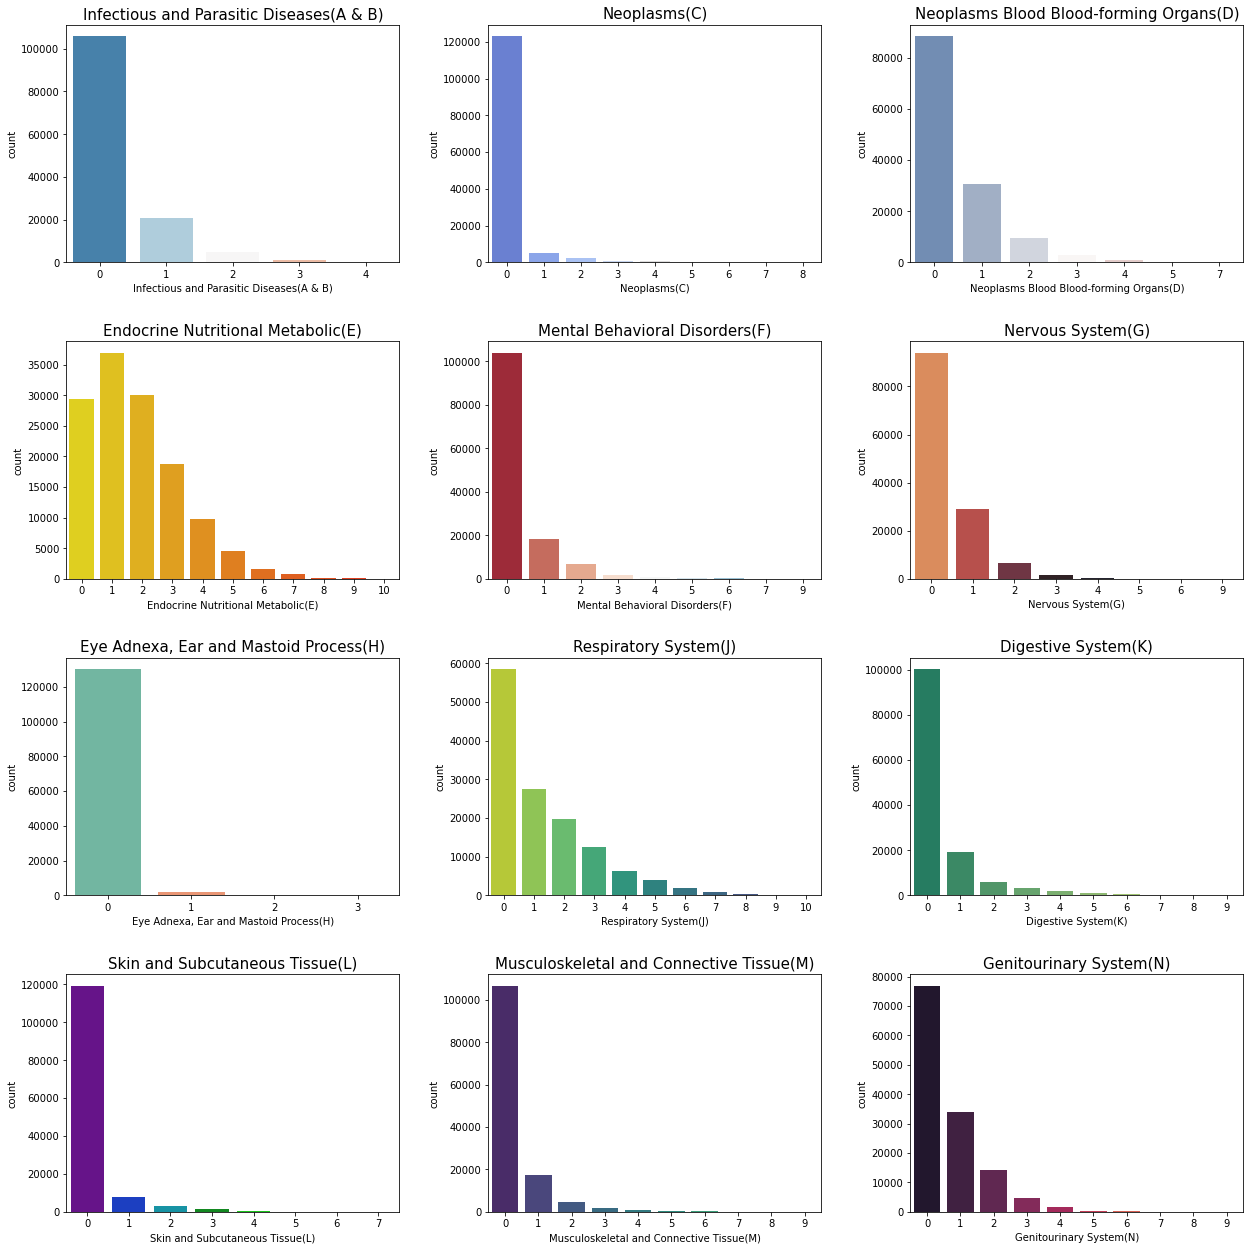

In [26]:
fig, axes = plt.subplots(4,3, figsize=(18,18))
position = 0

for row in range(4):
    for col in range(3):
        
        axes[row, col].set_title(col_names[position],fontdict={'fontsize': 15})
        
        sns.countplot(x=col_names[position],
                      palette = cat_colors[position], 
                      #edgecolor = sns.color_palette(cat_colors[position], 4),
                      linewidth=1,
                      ax = axes[row,col],
                      data=df20)
        
     
        
        position+= 1
        
plt.subplots_adjust(hspace=0.9)
plt.tight_layout(pad=3);

### Correlation

<AxesSubplot:>

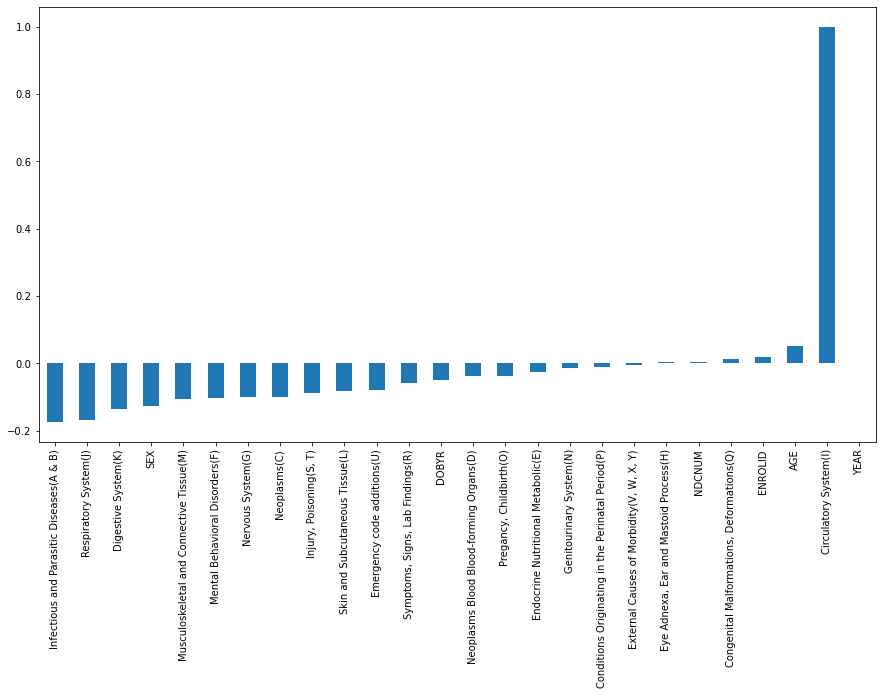

In [27]:
plt.figure(figsize=(15, 8))
df20.corr()['Circulatory System(I)'][:-1].sort_values().plot(kind='bar')

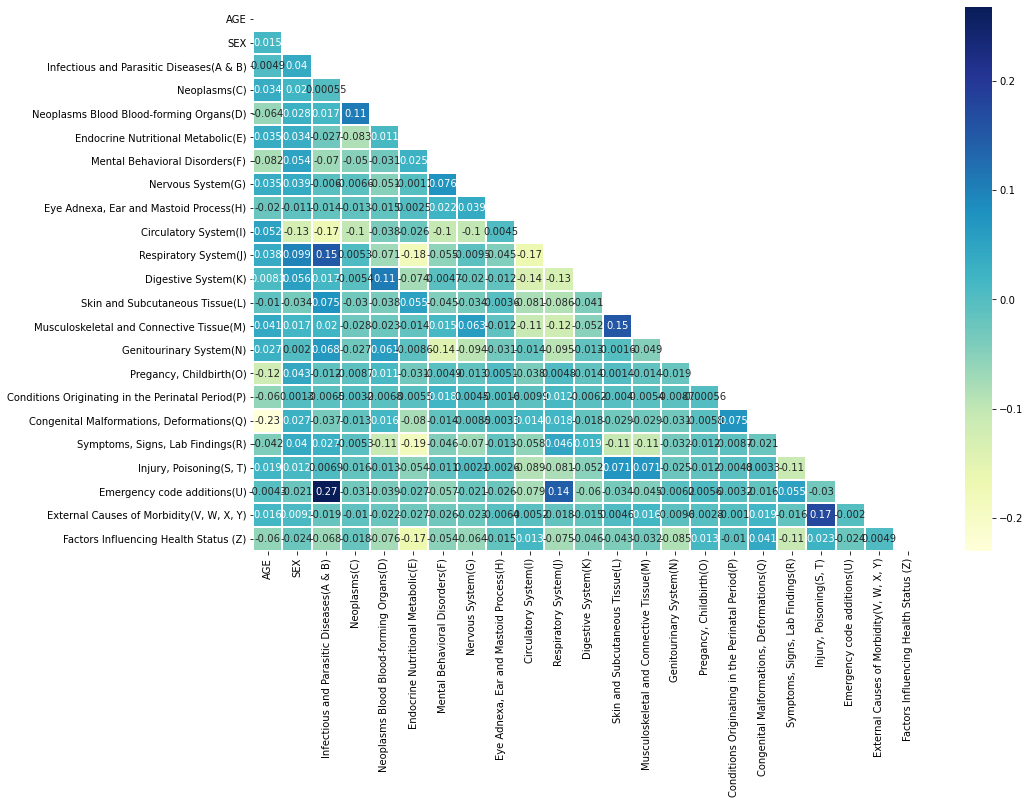

In [28]:

plt.figure(figsize=(15,10))
sns.heatmap(df20.drop(columns=['ENROLID', 'DOBYR', 'YEAR', 'NDCNUM']).corr(), mask=np.triu(df20.drop(columns=['ENROLID', 'DOBYR', 'YEAR', 'NDCNUM']).corr()), annot=True, cmap='YlGnBu',linewidth=2)
plt.show()

<AxesSubplot:>

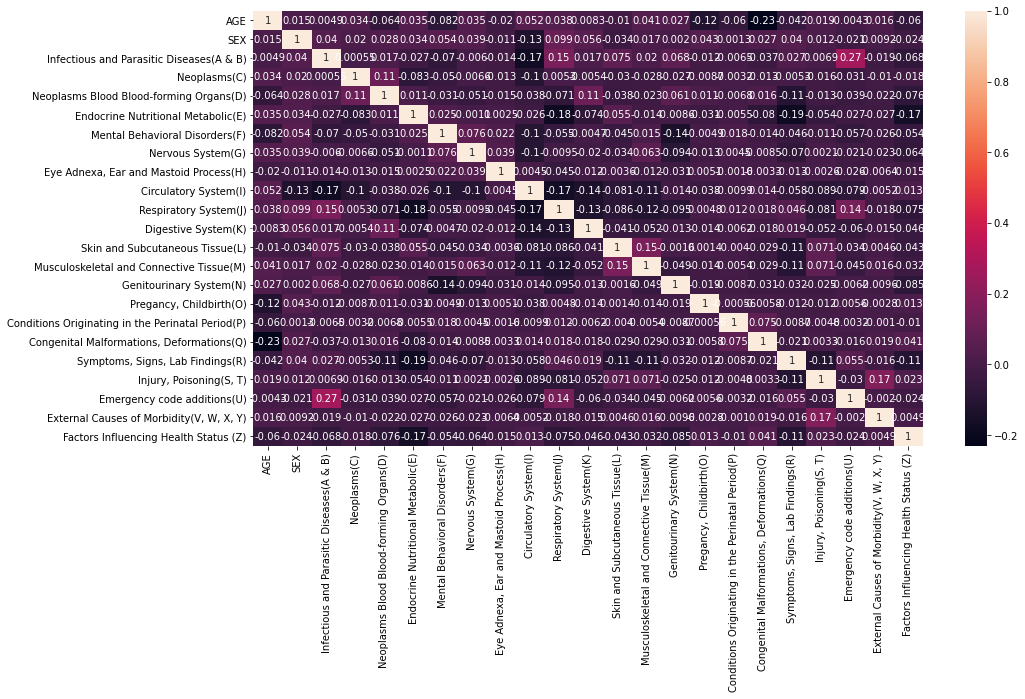

In [29]:
plt.figure(figsize=(15, 8))
sns.heatmap(df20.drop(columns=['ENROLID','DOBYR', 'YEAR', 'NDCNUM']).corr(), annot=True)

## Model building

In [30]:
df.head()

,ENROLID,DOBYR,YEAR,AGE,SEX,NDCNUM,Infectious and Parasitic Diseases(A & B),Neoplasms(C),Neoplasms Blood Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid Process(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Subcutaneous Tissue(L),Musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
1604,132687801,1958,2019,61,1,169750111,0,0,0,3,0,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0,1
1605,132687801,1958,2019,61,1,169750111,0,0,1,3,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
1607,133117002,1963,2019,56,2,169750111,0,0,1,6,0,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0
1608,133117002,1963,2019,56,2,169750111,3,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,1
1609,133276802,1959,2019,59,1,169750111,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df20.head()
#df.drop(columns = ['ENROLID', 'DOBYR', 'YEAR', 'NDCNUM'], axis = 1, inplace=True)
#df20.drop(columns = ['ENROLID', 'DOBYR', 'YEAR', 'NDCNUM'], axis = 1, inplace=True)

,ENROLID,DOBYR,YEAR,AGE,SEX,NDCNUM,Infectious and Parasitic Diseases(A & B),Neoplasms(C),Neoplasms Blood Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid Process(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Subcutaneous Tissue(L),Musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
2503,133117002,1963,2020,57,2,169750111,0,0,0,2,0,0,0,1,0,1,0,0,1,0,0,0,3,0,0,0,1
2504,133117002,1963,2020,57,2,169750111,0,0,1,3,0,0,0,1,0,0,0,0,1,0,0,0,6,1,0,0,0
2505,133117002,1963,2020,57,2,169750111,0,0,0,5,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0
2506,133117002,1963,2020,57,2,169750111,0,0,0,3,0,0,0,0,0,1,0,0,3,0,0,0,6,0,0,0,0
2507,133117002,1963,2020,57,2,169750111,0,0,0,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### Set input variables and target variable

In [32]:
X = df.drop(columns = ['Circulatory System(I)'], axis = 1).values
y = df20['Circulatory System(I)'].values[11179:132113] # what is a bettter way to split the data, df20 has more instance

### Import sklearn packages

In [33]:
from sklearn.model_selection import train_test_split

### Split training and testing data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Preprocessing, scale the data to be normalized

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

#### Neural network 

In [39]:
from tensorflow.keras.models import Sequential

In [40]:
from tensorflow.keras.layers import Dense, Dropout

In [41]:
model = Sequential()

model.add(Dense(23, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
model.fit(x=X_train, y=y_train, epochs = 300 , validation_data=(X_test, y_test))

Epoch 1/300
3024/3024 [==============================] - 4s 785us/step - loss: 0.4514 - val_loss: 0.4484
Epoch 2/300
3024/3024 [==============================] - 2s 662us/step - loss: 0.4491 - val_loss: 0.4486
Epoch 3/300
3024/3024 [==============================] - 2s 693us/step - loss: 0.4489 - val_loss: 0.4486
Epoch 4/300
3024/3024 [==============================] - 2s 664us/step - loss: 0.4487 - val_loss: 0.4485
Epoch 5/300
3024/3024 [==============================] - 2s 683us/step - loss: 0.4487 - val_loss: 0.4484
Epoch 6/300
3024/3024 [==============================] - 3s 1ms/step - loss: 0.4487 - val_loss: 0.4485
Epoch 7/300
3024/3024 [==============================] - 2s 676us/step - loss: 0.4484 - val_loss: 0.4485
Epoch 8/300
3024/3024 [==============================] - 2s 675us/step - loss: 0.4485 - val_loss: 0.4490
Epoch 9/300
3024/3024 [==============================] - 2s 646us/step - loss: 0.4484 - val_loss: 0.4492
Epoch 10/300
3024/3024 [==============================] -

3024/3024 [==============================] - 2s 654us/step - loss: 0.4454 - val_loss: 0.4523
Epoch 79/300
3024/3024 [==============================] - 2s 679us/step - loss: 0.4455 - val_loss: 0.4521
Epoch 80/300
3024/3024 [==============================] - 2s 651us/step - loss: 0.4453 - val_loss: 0.4521
Epoch 81/300
3024/3024 [==============================] - 2s 655us/step - loss: 0.4454 - val_loss: 0.4515
Epoch 82/300
3024/3024 [==============================] - 2s 651us/step - loss: 0.4453 - val_loss: 0.4515
Epoch 83/300
3024/3024 [==============================] - 2s 670us/step - loss: 0.4454 - val_loss: 0.4526
Epoch 84/300
3024/3024 [==============================] - 2s 673us/step - loss: 0.4454 - val_loss: 0.4516
Epoch 85/300
3024/3024 [==============================] - 2s 651us/step - loss: 0.4453 - val_loss: 0.4519
Epoch 86/300
3024/3024 [==============================] - 2s 650us/step - loss: 0.4452 - val_loss: 0.4518
Epoch 87/300
3024/3024 [==============================] - 2

Epoch 155/300
3024/3024 [==============================] - 2s 643us/step - loss: 0.4443 - val_loss: 0.4528
Epoch 156/300
3024/3024 [==============================] - 2s 652us/step - loss: 0.4442 - val_loss: 0.4528
Epoch 157/300
3024/3024 [==============================] - 2s 643us/step - loss: 0.4443 - val_loss: 0.4532
Epoch 158/300
3024/3024 [==============================] - 2s 645us/step - loss: 0.4442 - val_loss: 0.4527
Epoch 159/300
3024/3024 [==============================] - 2s 669us/step - loss: 0.4442 - val_loss: 0.4528
Epoch 160/300
3024/3024 [==============================] - 2s 653us/step - loss: 0.4442 - val_loss: 0.4543
Epoch 161/300
3024/3024 [==============================] - 2s 653us/step - loss: 0.4443 - val_loss: 0.4528
Epoch 162/300
3024/3024 [==============================] - 2s 648us/step - loss: 0.4442 - val_loss: 0.4531
Epoch 163/300
3024/3024 [==============================] - 2s 658us/step - loss: 0.4441 - val_loss: 0.4532
Epoch 164/300
3024/3024 [============

3024/3024 [==============================] - 2s 642us/step - loss: 0.4435 - val_loss: 0.4548
Epoch 232/300
3024/3024 [==============================] - 2s 642us/step - loss: 0.4435 - val_loss: 0.4552
Epoch 233/300
3024/3024 [==============================] - 2s 640us/step - loss: 0.4435 - val_loss: 0.4545
Epoch 234/300
3024/3024 [==============================] - 2s 640us/step - loss: 0.4434 - val_loss: 0.4549
Epoch 235/300
3024/3024 [==============================] - 2s 640us/step - loss: 0.4435 - val_loss: 0.4552
Epoch 236/300
3024/3024 [==============================] - 2s 642us/step - loss: 0.4435 - val_loss: 0.4557
Epoch 237/300
3024/3024 [==============================] - 2s 642us/step - loss: 0.4435 - val_loss: 0.4552
Epoch 238/300
3024/3024 [==============================] - 2s 639us/step - loss: 0.4434 - val_loss: 0.4557
Epoch 239/300
3024/3024 [==============================] - 2s 640us/step - loss: 0.4435 - val_loss: 0.4549
Epoch 240/300
3024/3024 [==========================

### Visualize the model prediction

In [43]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

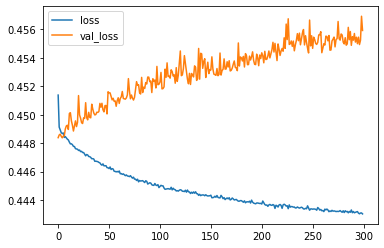

In [44]:
losses.plot()

## Prevent Overfitting

### Redefine the model

#### Add dropout 

In [45]:
from tensorflow.keras.layers import Dropout

In [46]:
model = Sequential()

model.add(Dense(23, activation = 'relu'))
model.add(Dropout(0.5)) # 50% of neruals randomly turn off

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

# binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

### Add early stopping point

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience=25)

### Fit the model

In [49]:
model.fit(x=X_train, y=y_train, epochs = 500 , validation_data=(X_test, y_test),
         callbacks = [early_stop])

Epoch 1/500
3024/3024 [==============================] - 2s 692us/step - loss: 0.4670 - val_loss: 0.4488
Epoch 2/500
3024/3024 [==============================] - 2s 671us/step - loss: 0.4513 - val_loss: 0.4481
Epoch 3/500
3024/3024 [==============================] - 2s 668us/step - loss: 0.4495 - val_loss: 0.4482
Epoch 4/500
3024/3024 [==============================] - 2s 676us/step - loss: 0.4489 - val_loss: 0.4481
Epoch 5/500
3024/3024 [==============================] - 2s 672us/step - loss: 0.4485 - val_loss: 0.4481
Epoch 6/500
3024/3024 [==============================] - 2s 674us/step - loss: 0.4485 - val_loss: 0.4480
Epoch 7/500
3024/3024 [==============================] - 2s 671us/step - loss: 0.4484 - val_loss: 0.4481
Epoch 8/500
3024/3024 [==============================] - 2s 670us/step - loss: 0.4483 - val_loss: 0.4481
Epoch 9/500
3024/3024 [==============================] - 2s 676us/step - loss: 0.4483 - val_loss: 0.4480
Epoch 10/500
3024/3024 [==============================]

<AxesSubplot:>

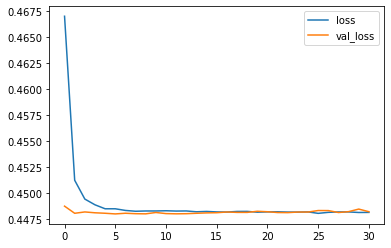

In [50]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [57]:
model = Sequential()

model.add(Dense(23, input_dim = 22,activation = 'relu'))
model.add(Dropout(0.5)) # 50% of neruals randomly turn off

model.add(Dense(17, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.5))

# binary classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [58]:
model.fit(x=X_train, y=y_train, epochs = 100 , validation_data=(X_test, y_test),
         callbacks = [early_stop])

Epoch 1/100


ValueError: in user code:

    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 22), found shape=(None, 26)


#### Visualize the model performance

In [55]:
model_loss1 = pd.DataFrame(model.history.history)

In [56]:
model_loss1.plot()

TypeError: no numeric data to plot

## Evaluation

In [62]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

ValueError: in user code:

    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 22), found shape=(None, 26)


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test, classes_x))

NameError: name 'classes_x' is not defined

### Confusion matrix

In [ ]:
print(confusion_matrix(y_test, classes_x))

In [ ]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

## Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree = DecisionTreeClassifier()

In [65]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
prediction = dtree.predict(X_test)

In [67]:
print(confusion_matrix(y_test, prediction))
print('\n')
print('Classification Summary--->')
print(classification_report(y_test, prediction))

[[  723  3270]
 [ 3912 16282]]


Classification Summary--->
              precision    recall  f1-score   support

           0       0.16      0.18      0.17      3993
           1       0.83      0.81      0.82     20194

    accuracy                           0.70     24187
   macro avg       0.49      0.49      0.49     24187
weighted avg       0.72      0.70      0.71     24187



## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(n_estimators=600)

In [70]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [71]:
rfc_pred = rfc.predict(X_test)

In [72]:
print('Confusion Matrix--->')
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print('Classification Summary--->')
print(classification_report(y_test, rfc_pred))

Confusion Matrix--->
[[  451  3542]
 [ 2456 17738]]


Classification Summary--->
              precision    recall  f1-score   support

           0       0.16      0.11      0.13      3993
           1       0.83      0.88      0.86     20194

    accuracy                           0.75     24187
   macro avg       0.49      0.50      0.49     24187
weighted avg       0.72      0.75      0.74     24187



In [73]:
# check the target variable is balanced or unbalanced

df20['Circulatory System(I)'].value_counts() # very unbalanced

1    110021
0     22092
Name: Circulatory System(I), dtype: int64

## Readjusted target variable to be balanced

In [84]:
df2 = pd.read_csv('2020_cleaned_data.csv', index_col = 0)

In [85]:
df2['I'].value_counts().head()

4    20937
5    20795
3    19316
6    17150
2    16132
Name: I, dtype: int64

In [86]:
# set total I is > 4 to 1, else 0
df2['I']  = df2['I'].apply(lambda x: 1 if x > 4 else 0)

In [87]:
df2['I'].value_counts()

1    69768
0    62345
Name: I, dtype: int64

<AxesSubplot:xlabel='I', ylabel='Probability'>

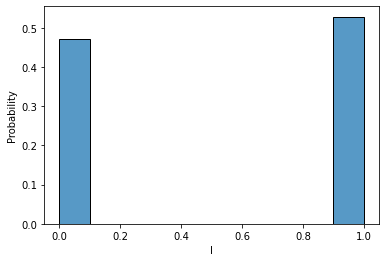

In [88]:
## visualize the target variable
sns.histplot(x = 'I',bins=10,stat = 'probability', data = df2)

In [89]:
df2.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,SEX,NDCNUM,PRODNME,T,U,V,W,X,Y,Z,M,N,O,P,R,S,Q,A,B,C,D,E,F,G,H,I,J,K,L,Factors Influencing Health Status(Z),Infectious and Parasitic Diseases(A & B),Neoplasms(C),Neoplasms Blood Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid Process(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Subcutaneous Tissue(L),Musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
2503,133117002,1963,2020,57,E1143,2,169750111,NOVOLOG,0,0,0,0,0,0,1,0,1,0,0,3,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,3,0,1,0,0,1,0,0,0,3,0,0,0,1
2504,133117002,1963,2020,57,E1310,2,169750111,NOVOLOG,0,0,0,0,0,0,0,0,1,0,0,6,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,3,0,0,0,0,1,0,0,0,6,1,0,0,0
2505,133117002,1963,2020,57,E1010,2,169750111,NOVOLOG,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,5,0,0,0,3,0,1,0,0,2,0,0,0,0,0,0,0,0
2506,133117002,1963,2020,57,E1143,2,169750111,NOVOLOG,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,2,0,1,0,0,3,0,0,0,6,0,0,0,0
2507,133117002,1963,2020,57,E1310,2,169750111,NOVOLOG,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,1,0,0,0,7,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1


In [90]:
# set new i to a new variable

df2['Circulatory System(I)'] = df2['I']

In [91]:
## drop all the temp columns

df2.drop(columns=['PDX', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 
                   'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 
                   'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
                   'Factors Influencing Health Status(Z)', 'PRODNME'], inplace = True)

In [92]:
df2.head()

,ENROLID,DOBYR,YEAR,AGE,SEX,NDCNUM,Infectious and Parasitic Diseases(A & B),Neoplasms(C),Neoplasms Blood Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid Process(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Subcutaneous Tissue(L),Musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
2503,133117002,1963,2020,57,2,169750111,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,3,0,0,0,1
2504,133117002,1963,2020,57,2,169750111,0,0,1,3,0,0,0,0,0,0,0,0,1,0,0,0,6,1,0,0,0
2505,133117002,1963,2020,57,2,169750111,0,0,0,5,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0
2506,133117002,1963,2020,57,2,169750111,0,0,0,3,0,0,0,0,0,1,0,0,3,0,0,0,6,0,0,0,0
2507,133117002,1963,2020,57,2,169750111,0,0,0,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Second time Prediction

In [93]:
X1 = df.drop(columns = ['Circulatory System(I)'], axis = 1).values
y1 = df2['Circulatory System(I)'].values[11179:132113]

### split training and testing data

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2)

### Preprocessing, scale the data to be normalized

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

## Neural Network

In [ ]:
model1 = Sequential()

model1.add(Dense(23, activation = 'relu'))
model1.add(Dropout(0.5)) # 50% of neruals randomly turn off

model1.add(Dense(15, activation = 'relu'))
model1.add(Dropout(0.5))

# binary classification
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam')

### Fit the model

In [ ]:
model1.fit(x=X_train, y=y_train, epochs = 500 , validation_data=(X_test, y_test),
         callbacks = [early_stop])

In [ ]:
loss = pd.DataFrame(model1.history.history)
loss.plot()

### Evaluation

In [ ]:
predict_x = model1.predict(X_test)
prediction = np.argmax(predict_x, axis=1)

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
print(confusion_matrix(y_test, prediction))

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 5, max_depth = 4) # n_estimators = 5

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, rf_pred))

In [ ]:
print(classification_report(y_test, rf_pred))

### Cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [ ]:
cv = GridSearchCV(rf, parameters, cv = 5)

In [ ]:
cv.fit(X_train, y_train) # take long time to run

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

## Decision Tree

In [ ]:
d_tree = DecisionTreeClassifier()

In [ ]:
d_tree.fit(X_train, y_train)

In [ ]:
pred = d_tree.predict(X_test)

In [ ]:
confusion_matrix(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

# Building Models with cross-validation and SMOTE sampling

## Decision Tree

#### Using SMOTE

In [96]:
sm = SMOTE(random_state = 33)

NameError: name 'SMOTE' is not defined

In [97]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

NameError: name 'sm' is not defined

In [98]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

NameError: name 'y_train_new' is not defined

In [99]:
model1 = Sequential()

model1.add(Dense(23, activation = 'relu'))
model1.add(Dropout(0.5)) # 50% of neruals randomly turn off

model1.add(Dense(15, activation = 'relu'))
model1.add(Dropout(0.5))

# binary classification
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model1.fit(x=X_train_new, y=y_train_new, epochs = 500 , validation_data=(X_test, y_test),
         callbacks = [early_stop])

In [ ]:
predicted = model1.predict(X_test)
pred_y = np.argmax(predicted, axis=1)

In [ ]:
confusion_matrix(y_test, pred_y)

In [ ]:
dtree1 = DecisionTreeClassifier()

In [ ]:
dtree1.fit(X_train_new, y_train_new)

In [ ]:
predtion = dtree1.predict(X_test)

In [ ]:
confusion_matrix(y_test, predtion)

In [ ]:
print(classification_report(y_test, predtion))

In [ ]:
train_pred_sm = dtree1.predict(X_train_new)

In [ ]:
test_pred_sm = dtree1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_pred_sm, y_train_new)

In [ ]:
accuracy_score(test_pred_sm, y_test)

In [ ]:
confusion_matrix(y_test, test_pred_sm)

In [ ]:
print(pd.crosstab(y_test.ravel(), test_pred_sm.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

In [ ]:
8279 / 12885

In [ ]:
df.shape

In [ ]:
df20.shape